# Projekt końcowy

### Poniższy projekt ma na celu zbudowanie modelu klasyfikacyjnego, który na podstawie podanych danych będzie przewidywał, czy potencjalny pożyczkobiorca spłaci swój dług.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from matplotlib import pyplot
from scipy.spatial.distance import euclidean
from sklearn.ensemble import RandomForestClassifier
from ds_utils.unsupervised import plot_loss_vs_cluster_number
from imblearn.pipeline import Pipeline
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install data-science-utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip3 install catboost

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip3 install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [8]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Wczytanie danych

In [11]:
df=pd.read_csv('Loan_data.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_11352\140937924.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Loan_data.csv')


In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(42536, 151)

In [14]:
#Dane zawierają 42536 obserwacji i 151 kolumn - łącznie z kolumną ze statusem pożyczki 'loan_status' (zmienna objaśniana)

In [15]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [17]:
df.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [18]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [19]:
#Importuję opis zmiennych 
df_description = pd.read_csv('LCDataDictionary.csv')

In [20]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [21]:
df_description[['LoanStatNew', 'Description']]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Sprawdzam brakujące wartości

In [22]:
df.isna().sum()

id                                                0
member_id                                     42536
loan_amnt                                         1
funded_amnt                                       1
funded_amnt_inv                                   1
term                                              1
int_rate                                          1
installment                                       1
grade                                             1
sub_grade                                         1
emp_title                                      2627
emp_length                                     1113
home_ownership                                    1
annual_inc                                        5
verification_status                               1
issue_d                                           1
loan_status                                       1
pymnt_plan                                        1
url                                               1
desc        

In [23]:
#Sprawdzam i usuwam kolumny w 100% z nan

In [24]:
nan_cols = [i for i in df.columns if df[i].isnull().all()]

In [25]:
nan_cols

['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_li

In [26]:
df.drop(nan_cols, axis=1, inplace=True)

In [27]:
#Usuwam kolumny, które zawierają nan w 85% 

In [28]:
nan_cols85 = [i for i in df.columns if df[i].isnull().sum() > 0.85*len(df)]

In [29]:
nan_cols85

['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [30]:
df.drop(nan_cols85, axis=1, inplace=True)

In [31]:
#Usunięcie kolumn ze zbędnymi informacjami

In [32]:
df.drop(
['url', 
 'id', 
 'zip_code', 
 'addr_state', 
 'title',
 'last_pymnt_amnt',
 'last_pymnt_d', 
 'last_credit_pull_d',
 'emp_title',
 'disbursement_method',
 'recoveries',
 'collection_recovery_fee',
 'revol_bal',
 'revol_util',
 'funded_amnt_inv',
 'sub_grade'],
axis=1, inplace=True)

In [33]:
#Usunięcie kolumn z informacjami 'z przyszłości' - niedostępnymi w momencie przyznawania pożyczki

In [34]:
df.drop(
['delinq_2yrs', 
 'mths_since_last_delinq', 
 'delinq_amnt', 
 'hardship_flag', 
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'debt_settlement_flag',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_fico_range_high',
 'last_fico_range_low'],
axis=1, inplace=True)

In [35]:
# Sprawdzam, które kolumny przyjmują tylko jedną wartość. Sprawdzam też, czy zawierają brakujące wartości 
# (duża ilość brakujących wartości może oznaczać, że mogą one dawać jakąś informację - 
# wprowadzając dane ktoś nie wpisywał jakiejś wartości (np. 0), ale zostawiał puste miejsca)

In [36]:
df['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [37]:
df['application_type'].isnull().sum()

1

In [38]:
df.drop(
['application_type'],
axis=1, inplace=True)

In [39]:
df['pymnt_plan'].value_counts()

n    42535
Name: pymnt_plan, dtype: int64

In [40]:
df['pymnt_plan'].isnull().sum()

1

In [41]:
df.drop(
['pymnt_plan'],
axis=1, inplace=True)

In [42]:
df['initial_list_status'].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [43]:
df['initial_list_status'].isnull().sum()

1

In [44]:
df.drop(
['initial_list_status'],
axis=1, inplace=True)

In [45]:
df['out_prncp'].value_counts()

0.000    42535
Name: out_prncp, dtype: int64

In [46]:
df['out_prncp'].isnull().sum()

1

In [47]:
df.drop(
['out_prncp'],
axis=1, inplace=True)

In [48]:
df['out_prncp_inv'].value_counts()

0.000    42535
Name: out_prncp_inv, dtype: int64

In [49]:
df['out_prncp_inv'].isnull().sum()

1

In [50]:
df.drop(
['out_prncp_inv'],
axis=1, inplace=True)

In [51]:
df['policy_code'].value_counts()

1.000    42535
Name: policy_code, dtype: int64

In [52]:
df['policy_code'].isnull().sum()

1

In [53]:
df.drop(
['policy_code'],
axis=1, inplace=True)

In [54]:
df['collections_12_mths_ex_med'].value_counts()

0.000    42390
Name: collections_12_mths_ex_med, dtype: int64

In [55]:
df['collections_12_mths_ex_med'].isnull().sum()

146

In [56]:
df.drop(
['collections_12_mths_ex_med'],
axis=1, inplace=True)

In [57]:
df['tax_liens'].value_counts()

0.000    42429
1.000        1
Name: tax_liens, dtype: int64

In [58]:
df['tax_liens'].isnull().sum()

106

In [59]:
df.drop(
['tax_liens'],
axis=1, inplace=True)

In [60]:
df.drop_duplicates(inplace= True)

In [61]:
df.shape

(42536, 23)

In [62]:
#Decuję też usunąć kolumnę 'desc' - w większości powiela ona dane z kolumny 'purpose'
df.drop(['desc'],
axis=1, inplace=True)

In [63]:
df.shape

(42536, 22)

### Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [64]:
def usuniecie_miesiecy(df, column):
    df[column] = pd.to_numeric(df[column].str.replace('months', ''))

In [65]:
usuniecie_miesiecy(df, 'term')

In [66]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,36.000,10.65%,162.870,B,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,9.000,0.000
1,2500.000,2500.000,60.000,15.27%,59.830,C,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,4.000,0.000
2,2400.000,2400.000,36.000,15.96%,84.330,C,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,10.000,0.000
3,10000.000,10000.000,36.000,13.49%,339.310,C,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,37.000,0.000
4,3000.000,3000.000,60.000,12.69%,67.790,B,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,38.000,0.000


In [67]:
#usuwam dodatkowe znaki z kolumny 'emp_length'

In [68]:
df['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [69]:
def usuniecie_znakow(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')

In [70]:
usuniecie_znakow(df,'emp_length')

C:\Users\asus\AppData\Local\Temp\ipykernel_11352\1282640428.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [71]:
df['emp_length'].value_counts()

10    9369
0     5062
2     4743
3     4364
4     3649
1     3595
5     3458
6     2375
7     1875
8     1592
9     1341
Name: emp_length, dtype: int64

In [72]:
df['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [73]:
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce').convert_dtypes() 

In [74]:
#przekształcenie procentow

In [75]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [76]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,36.000,0.106,162.870,B,10,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,9.000,0.000
1,2500.000,2500.000,60.000,0.153,59.830,C,0,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,4.000,0.000
2,2400.000,2400.000,36.000,0.160,84.330,C,10,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,10.000,0.000
3,10000.000,10000.000,36.000,0.135,339.310,C,10,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,37.000,0.000
4,3000.000,3000.000,60.000,0.127,67.790,B,1,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,38.000,0.000


In [77]:
# wartości związane z datą - zamieniam je na zmienne kategoryczne

In [78]:
df['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [79]:
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year

In [80]:
# issue_d

In [81]:
df['issue_d'].value_counts()

Dec-2011    2267
Nov-2011    2232
Oct-2011    2118
Sep-2011    2067
Aug-2011    1934
Jul-2011    1875
Jun-2011    1835
May-2011    1704
Apr-2011    1563
Mar-2011    1448
Jan-2011    1380
Dec-2010    1335
Feb-2011    1298
Oct-2010    1232
Nov-2010    1224
Jul-2010    1204
Sep-2010    1189
Aug-2010    1175
Jun-2010    1105
May-2010     989
Apr-2010     912
Mar-2010     828
Feb-2010     682
Jan-2010     662
Nov-2009     662
Dec-2009     658
Oct-2009     604
Sep-2009     507
Aug-2009     446
Jul-2009     411
Jun-2009     406
Mar-2008     402
May-2009     359
Apr-2009     333
Mar-2009     324
Feb-2008     306
Jan-2008     305
Feb-2009     302
Jan-2009     269
Apr-2008     259
Dec-2008     253
Nov-2008     209
Dec-2007     172
Jul-2008     141
Jun-2008     124
Oct-2008     122
May-2008     115
Nov-2007     112
Oct-2007     105
Aug-2008     100
Aug-2007      74
Jul-2007      63
Sep-2008      57
Sep-2007      53
Jun-2007      24
Name: issue_d, dtype: int64

In [82]:
df['issue_d'].dtypes

dtype('O')

In [83]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

In [84]:
df['issue_d'].dtypes

dtype('<M8[ns]')

### BRAKUJĄCE WARTOŚCI

In [85]:
df.isna().sum()

loan_amnt                  1
funded_amnt                1
term                       1
int_rate                   1
installment                1
grade                      1
emp_length              1113
home_ownership             1
annual_inc                 5
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
dti                        1
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
inq_last_6mths            30
open_acc                  30
pub_rec                   30
total_acc                 30
pub_rec_bankruptcies    1366
dtype: int64

In [86]:
## Brakujące dane
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
pub_rec_bankruptcies,1366,0.032
emp_length,1113,0.026
total_acc,30,0.001
pub_rec,30,0.001
open_acc,30,0.001
inq_last_6mths,30,0.001
earliest_cr_line,30,0.001
annual_inc,5,0.000
purpose,1,0.000
fico_range_high,1,0.000


In [87]:
df.isna().sum()

loan_amnt                  1
funded_amnt                1
term                       1
int_rate                   1
installment                1
grade                      1
emp_length              1113
home_ownership             1
annual_inc                 5
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
dti                        1
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
inq_last_6mths            30
open_acc                  30
pub_rec                   30
total_acc                 30
pub_rec_bankruptcies    1366
dtype: int64

In [88]:
# Dane kategoryczne

# Będę je uzupełniać najczęściej występującą wartością

In [89]:
#term
df['term'].value_counts()

36.000    31534
60.000    11001
Name: term, dtype: int64

In [90]:
df['term'].fillna(36.0, inplace=True)

In [91]:
#grade
df['grade'].value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [92]:
df['grade'].fillna('B', inplace=True)

In [93]:
#home_ownership
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [94]:
df['home_ownership'].fillna('RENT', inplace=True)

In [95]:
#purpose
df['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [96]:
df['purpose'].fillna('debt_consolidation', inplace=True)

In [97]:
# emp_length
df['emp_length'].value_counts()

10    9369
0     5062
2     4743
3     4364
4     3649
1     3595
5     3458
6     2375
7     1875
8     1592
9     1341
Name: emp_length, dtype: Int64

In [98]:
df['emp_length'].fillna('10', inplace=True)

In [99]:
#loan_status
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [100]:
df['loan_status'].fillna('Fully Paid', inplace=True)

In [101]:
#verification_status
df['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [102]:
df['verification_status'].fillna('Not Verified', inplace=True)

In [103]:
#issue_d
df['issue_d'].value_counts()

2011-12-01    2267
2011-11-01    2232
2011-10-01    2118
2011-09-01    2067
2011-08-01    1934
2011-07-01    1875
2011-06-01    1835
2011-05-01    1704
2011-04-01    1563
2011-03-01    1448
2011-01-01    1380
2010-12-01    1335
2011-02-01    1298
2010-10-01    1232
2010-11-01    1224
2010-07-01    1204
2010-09-01    1189
2010-08-01    1175
2010-06-01    1105
2010-05-01     989
2010-04-01     912
2010-03-01     828
2010-02-01     682
2010-01-01     662
2009-11-01     662
2009-12-01     658
2009-10-01     604
2009-09-01     507
2009-08-01     446
2009-07-01     411
2009-06-01     406
2008-03-01     402
2009-05-01     359
2009-04-01     333
2009-03-01     324
2008-02-01     306
2008-01-01     305
2009-02-01     302
2009-01-01     269
2008-04-01     259
2008-12-01     253
2008-11-01     209
2007-12-01     172
2008-07-01     141
2008-06-01     124
2008-10-01     122
2008-05-01     115
2007-11-01     112
2007-10-01     105
2008-08-01     100
2007-08-01      74
2007-07-01      63
2008-09-01  

In [104]:
df['issue_d'].fillna('2011-12-01', inplace=True)

In [105]:
df['pub_rec_bankruptcies'].value_counts()

0.000    39316
1.000     1846
2.000        8
Name: pub_rec_bankruptcies, dtype: int64

In [106]:
df['pub_rec_bankruptcies'].fillna('0.000', inplace=True)

In [107]:
df['emp_length'].value_counts()

10    10482
0      5062
2      4743
3      4364
4      3649
1      3595
5      3458
6      2375
7      1875
8      1592
9      1341
Name: emp_length, dtype: Int64

In [108]:
df['emp_length'].fillna('10', inplace=True)

In [109]:
df['open_acc'].value_counts()

7.000     4252
8.000     4176
6.000     4172
9.000     3922
10.000    3386
5.000     3368
11.000    2944
4.000     2508
12.000    2398
13.000    2060
3.000     1608
14.000    1597
15.000    1290
16.000    1022
17.000     812
2.000      692
18.000     588
19.000     442
20.000     335
21.000     276
22.000     170
23.000     121
24.000      87
25.000      63
26.000      40
1.000       39
27.000      29
28.000      29
30.000      17
29.000      16
31.000      13
34.000       8
32.000       6
33.000       5
35.000       4
36.000       2
38.000       2
37.000       1
46.000       1
39.000       1
42.000       1
41.000       1
44.000       1
47.000       1
Name: open_acc, dtype: int64

In [110]:
df['open_acc'].fillna('7.000', inplace=True)

In [111]:
df['pub_rec'].value_counts()

0.000    40130
1.000     2298
2.000       64
3.000       11
4.000        2
5.000        1
Name: pub_rec, dtype: int64

In [112]:
df['pub_rec'].fillna('0.000', inplace=True)

In [113]:
df['pub_rec_bankruptcies'].value_counts()

0.0      39316
1.0       1846
0.000     1366
2.0          8
Name: pub_rec_bankruptcies, dtype: int64

In [114]:
df['pub_rec_bankruptcies'].fillna('0.000', inplace=True)

In [115]:
df['total_acc'].value_counts()

15.000    1552
16.000    1547
17.000    1543
14.000    1531
20.000    1504
18.000    1493
21.000    1483
13.000    1480
12.000    1416
19.000    1404
22.000    1363
11.000    1343
23.000    1336
24.000    1327
10.000    1266
25.000    1221
9.000     1149
27.000    1139
26.000    1119
8.000     1072
28.000    1041
29.000     985
30.000     926
7.000      897
31.000     861
32.000     848
6.000      757
33.000     687
34.000     679
5.000      622
35.000     621
36.000     563
37.000     524
4.000      486
38.000     485
39.000     463
40.000     352
41.000     324
42.000     308
43.000     279
44.000     249
3.000      238
45.000     205
46.000     201
47.000     188
48.000     169
49.000     138
50.000     132
52.000     121
63.000     108
51.000     104
53.000      99
54.000      76
55.000      63
61.000      52
56.000      52
57.000      49
59.000      46
62.000      45
2.000       41
58.000      39
60.000      32
1.000       21
64.000       7
66.000       5
67.000       4
65.000    

In [116]:
df['total_acc'].fillna('15.000', inplace=True)

In [117]:
df['earliest_cr_line'].value_counts()

2000.000    3436
1999.000    3152
1998.000    3066
2001.000    2667
1997.000    2622
1996.000    2426
1995.000    2292
1994.000    2166
2002.000    2059
2003.000    1976
2004.000    1890
2005.000    1639
1993.000    1610
2006.000    1343
1992.000    1155
1990.000    1113
1991.000    1039
1989.000     931
1988.000     783
2007.000     767
1987.000     664
1986.000     533
1985.000     486
1984.000     433
1983.000     360
1982.000     238
1981.000     207
1980.000     187
1979.000     178
1978.000     173
2008.000     160
1977.000     124
1976.000     112
1975.000      87
1974.000      71
1973.000      69
1972.000      56
1971.000      50
1970.000      49
1969.000      41
1968.000      23
1967.000      18
1963.000      12
1966.000      11
1964.000       9
1965.000       9
1962.000       5
1954.000       2
1959.000       2
1961.000       2
1956.000       1
1946.000       1
1950.000       1
Name: earliest_cr_line, dtype: int64

In [118]:
df['earliest_cr_line'].fillna('2000.000', inplace=True)

In [119]:
df['inq_last_6mths'].value_counts()

0.000     19657
1.000     11247
2.000      5987
3.000      3182
4.000      1056
5.000       596
6.000       339
7.000       182
8.000       115
9.000        50
10.000       24
11.000       15
12.000       15
15.000        9
13.000        6
14.000        6
18.000        4
16.000        3
17.000        2
24.000        2
19.000        2
32.000        1
33.000        1
31.000        1
28.000        1
25.000        1
27.000        1
20.000        1
Name: inq_last_6mths, dtype: int64

In [120]:
df['inq_last_6mths'].fillna('0.000', inplace=True)

In [121]:
# Zmienne ciągłe
# Będę je uzupełniać medianą

In [122]:
#loan_amnt
df['loan_amnt'].fillna(df['loan_amnt'].median(), inplace=True)

In [123]:
#funded_amnt
df['funded_amnt'].fillna(df['funded_amnt'].median(), inplace=True)

In [124]:
#int_rate
df['int_rate'].fillna(df['int_rate'].median(), inplace=True)

In [125]:
#installment
df['installment'].fillna(df['installment'].median(), inplace=True)

In [126]:
#annual_inc
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [127]:
#dti
df['dti'].fillna(df['dti'].median(), inplace=True)

In [128]:
#fico_range_low
df['fico_range_low'].fillna(df['fico_range_low'].median(), inplace=True)

In [129]:
#fico_range_high
df['fico_range_high'].fillna(df['fico_range_high'].median(), inplace=True)

In [130]:
df.isna().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

# EDA

### Kolumna ze statusem pożyczki

In [131]:
# Zmienną objaśnianą jest kolumna ze statusem pożyczki - 'loan_status. Zadaniem jest przewidzenie, 
# czy klient spłaci kredyt - 1, czy nie spłaci - 0

In [132]:
df['loan_status'].value_counts()

Fully Paid                                             34117
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [133]:
df['loan_status'] = df['loan_status'].map({'Fully Paid' :1, 'Does not meet the credit policy. Status:Fully Paid' : 1, 
                                            'Charged Off' : 0, 'Does not meet the credit policy. Status:Charged Off' : 0})

In [134]:
df['loan_status'].value_counts()

1    36105
0     6431
Name: loan_status, dtype: int64

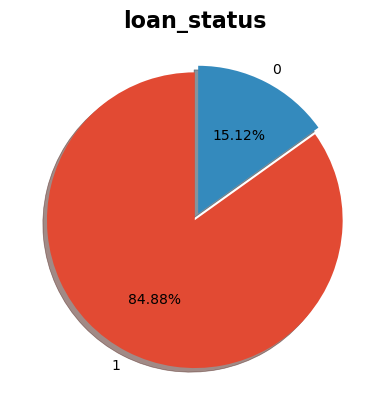

In [135]:
#Chcę sprawdzić, jaki rozkład ma zmienna dotycząca spłaty pożyczki. 

plt.style.use('ggplot')

data = df['loan_status'].value_counts(normalize=True)
plt.pie(data, labels=data.index, startangle = 90, shadow = True, radius=1, explode= [0,0.05],autopct='%0.2f%%')
plt.title('loan_status', fontsize=16, fontweight='bold')
plt.show()

In [136]:
# Dane są niezbalansowane - prawie 85% stanowią spłacone pożyczki, niespłacone zaledwie 15%
# Później zbilansuje je metodą SMOTE

In [137]:
#Funkcje, których będę używała do obliczeń dla wybranych zmiennych

In [138]:
def statystyka (df, zmienna):
    '''
    Ta funkcja oblicza podstawowe statystyki dla poszczegolnych zmiennych ze zbioru df
    '''
    print('Minimum: ', df[zmienna].min())
    print('Maximum: ',df[zmienna].max())
    print('Mean value: ', df[zmienna].mean())
    print('Median value: ',df[zmienna].median())
    print('Standard deviation: ', df[zmienna].std())

In [139]:
def kwartyle(df, zmienna):
    Q1=df[zmienna].quantile(q=0.25)
    Q3=df[zmienna].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(df[zmienna]))

In [140]:
def gorny_dolny_outlier(dr, zmienna, Q1, Q3):
    '''
    Ta funkcja wylicza zakres od 1. do 3. kwartyla. Powyżej 3. kwartyla wartości należą do outlierow
    '''
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers: ', L_outliers)
    print('Upper outliers: ', U_outliers)

In [141]:
def liczba_outlierow (df, wartosc, upper_out, lower_out):
    '''
    Ta funkcja będzie pokazywała liczbę outlierow oraz ich procentowy udział
    '''
    print('Liczba outlierow upper : ', df[df[wartosc]>upper_out][wartosc].count())
    print('Liczba outlierow lower : ', df[df[wartosc]<lower_out][wartosc].count())
    print('% outlierow upper: ',(df[df[wartosc]>upper_out][wartosc].count()*100/len(df)), '%')
    print('% outlierow lower: ',(df[df[wartosc]<lower_out][wartosc].count()*100/len(df)), '%')

## Zmienne numeryczne

### INTEREST RATE

In [142]:
statystyka(df, 'int_rate')

Minimum:  0.0542
Maximum:  0.2459
Mean value:  0.12165011519652409
Median value:  0.1199
Standard deviation:  0.037078920181680304


In [143]:
kwartyle(df, 'int_rate')

1st Quartile (Q1) is:  0.09630000000000001
3st Quartile (Q3) is:  0.1472
Interquartile range (IQR) is  0.05089999999999999


In [144]:
gorny_dolny_outlier(df,'int_rate', 0.097, 0.15)

Lower outliers:  0.017500000000000016
Upper outliers:  0.22949999999999998


In [145]:
liczba_outlierow(df, 'int_rate', 0.224, 0.02)

Liczba outlierow upper :  94
Liczba outlierow lower :  0
% outlierow upper:  0.22098927966898627 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


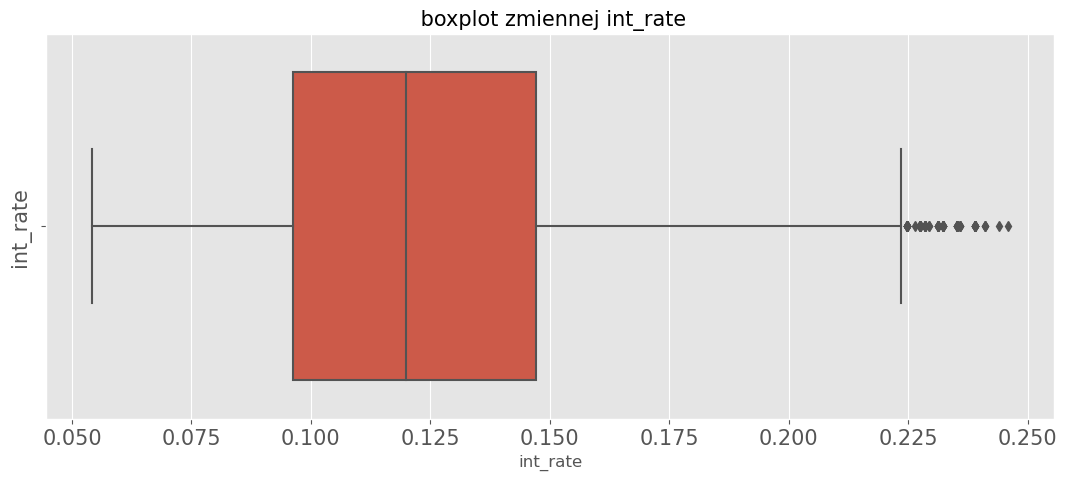

In [146]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='int_rate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('int_rate', fontsize=15)
ax1.set_title(' boxplot zmiennej int_rate', fontsize=15)
ax1.tick_params(labelsize=15)

In [147]:
# Outliery powyżej 22%
# Zakres od 5,5% do 22% (większość mieści się w granicy 9-14.7%)
# Mediana jest lekko przesunięta w stronę dolnej granicy 

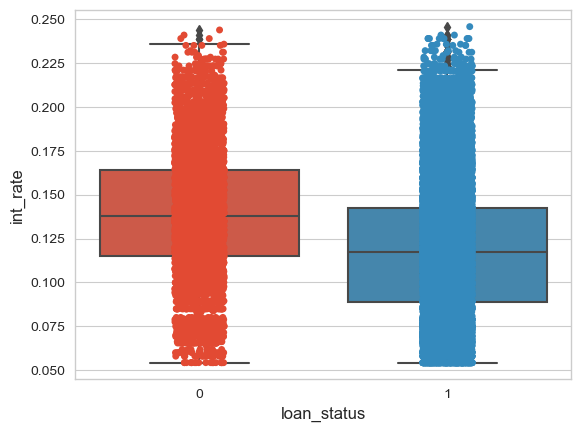

In [148]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='int_rate',data=df)
ax = sns.stripplot(x="loan_status", y="int_rate",data=df)

In [149]:
# Osoby niespłacające kredytów mają wyższy zakres oprocentowania kredytów w porównaniu z osobami spłacającymi

In [150]:
#Z tych danych wynika, że osoby niespłacające kredytów otrzymują wyższe oprocentowanie (średnio)

pd.pivot_table(df, index='loan_status', values="int_rate", aggfunc='mean')

,int_rate
loan_status,
0,0.139
1,0.119


In [151]:
#Im wyższa klasa, tym wyższe oprocentowanie kredytu. Różnice między nie- i spłacającymi są minimalne

pd.pivot_table(df, index='loan_status',columns='grade', values='int_rate', aggfunc='mean')

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,0.076,0.111,0.135,0.156,0.175,0.194,0.204
1,0.073,0.110,0.135,0.156,0.174,0.192,0.205


### ANNUAL INCOME

In [152]:
statystyka(df, 'annual_inc')

Minimum:  1896.0
Maximum:  6000000.0
Mean value:  69135.36489350203
Median value:  59000.0
Standard deviation:  64092.676551074255


In [153]:
kwartyle(df, 'annual_inc')

1st Quartile (Q1) is:  40000.0
3st Quartile (Q3) is:  82500.0
Interquartile range (IQR) is  42500.0


In [154]:
gorny_dolny_outlier(df, 'annual_inc', 40000, 82500)

Lower outliers:  -23750.0
Upper outliers:  146250.0


In [155]:
liczba_outlierow(df, 'annual_inc', 146250, -23750)

Liczba outlierow upper :  2032
Liczba outlierow lower :  0
% outlierow upper:  4.777129960504044 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


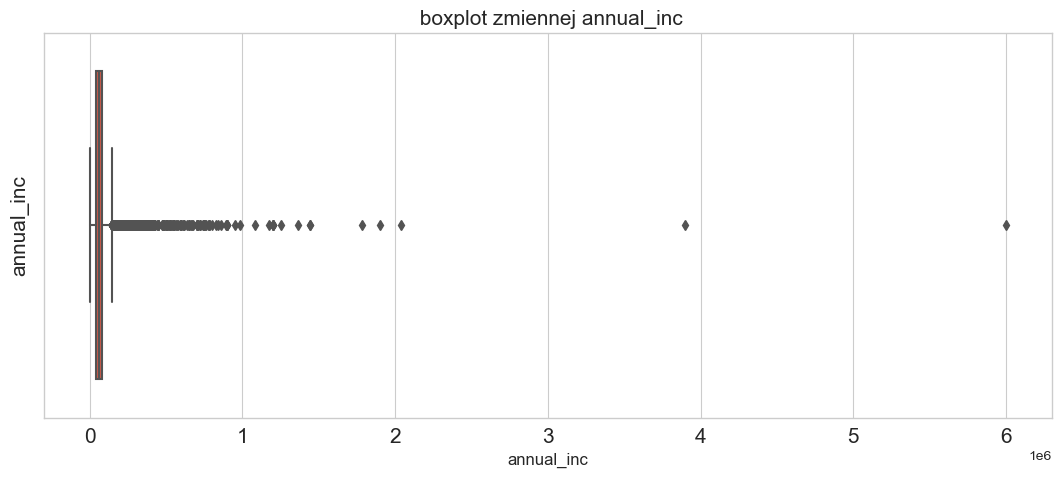

In [156]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='annual_inc',data=df,orient='v',ax=ax1)
ax1.set_ylabel('annual_inc', fontsize=15)
ax1.set_title(' boxplot zmiennej annual_inc', fontsize=15)
ax1.tick_params(labelsize=15)

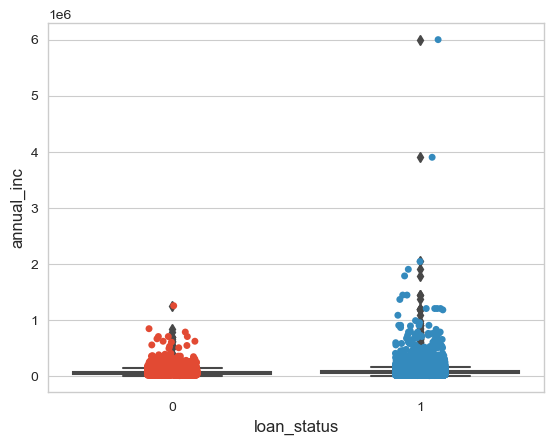

In [157]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='annual_inc',data=df)
ax = sns.stripplot(x="loan_status", y="annual_inc",data=df)

In [158]:
# Obie grupy mają dość wąski zakres wartości. Większość osób spłacających ma wyższe dochody. 
# W grupie tej występuje też dużo więcej outlierów w górnej granicy

In [159]:
df.corr()['annual_inc'].sort_values().tail(10)

loan_status       0.038
term              0.043
fico_range_low    0.052
fico_range_high   0.052
int_rate          0.054
emp_length        0.099
funded_amnt       0.272
loan_amnt         0.276
installment       0.278
annual_inc        1.000
Name: annual_inc, dtype: float64

In [160]:
#Zmienna 'annual_inc' jest wysoko pozytywnie skorelowana ze zmiennymi 'funded_amnt', loan_amnt' i 'installment'

In [161]:
pd.pivot_table(df, index='loan_status', values="annual_inc", aggfunc='mean')

,annual_inc
loan_status,
0,63366.871
1,70162.845


In [162]:
#Osoby niespłacające mają niższe roczne dochody

### DTi

In [163]:
#Jest to wskaźnik pokazujący, jaką część miesięcznych zarobków kredytobiorcy stanowi rata kredytu. 

In [164]:
statystyka(df, 'dti')

Minimum:  0.0
Maximum:  29.99
Mean value:  13.373045420349804
Median value:  13.47
Standard deviation:  6.7262358496920145


In [165]:
kwartyle(df, 'dti')

1st Quartile (Q1) is:  8.2
3st Quartile (Q3) is:  18.68
Interquartile range (IQR) is  10.48


In [166]:
gorny_dolny_outlier(df, 'dti', 8.2, 10.48)

Lower outliers:  4.779999999999998
Upper outliers:  13.900000000000002


In [167]:
liczba_outlierow(df, 'dti', 13.90, 4.78)

Liczba outlierow upper :  20320
Liczba outlierow lower :  5217
% outlierow upper:  47.77129960504043 %
% outlierow lower:  12.264905021628739 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


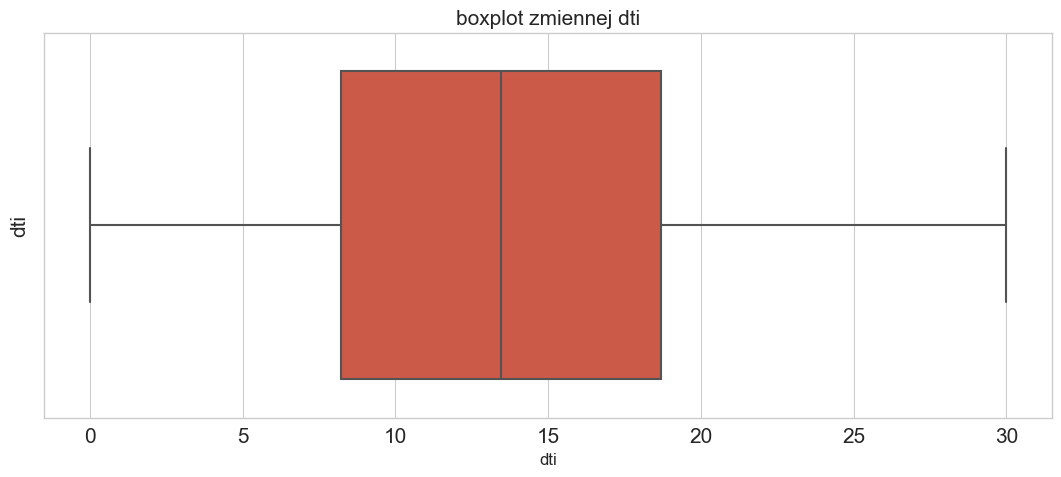

In [168]:
fig, (ax1)=plt.subplots(figsize=(13,5))

#boxplot
sns.boxplot(x='dti',data=df,orient='v',ax=ax1)
ax1.set_ylabel('dti', fontsize=15)
ax1.set_title('boxplot zmiennej dti', fontsize=15)
ax1.tick_params(labelsize=15)

In [169]:
# Zmienna dti ma rozkład normalny - mediana przecina pudełko na pół
# Najwięcej osób ma wskażnik na poziomie 8-18%

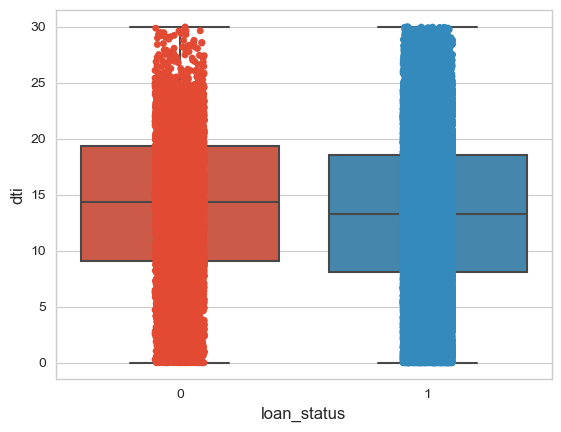

In [170]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='dti',data=df)
ax = sns.stripplot(x="loan_status", y='dti',data=df)

In [171]:
# Osoby spłacjące kredyty mają niższy wskaźnik dti

In [172]:
# Większy odsetek osób niespłacających ma wyższy wskaźnik dti 

In [173]:
pd.pivot_table(df, index='loan_status', values='dti', aggfunc='mean')

,dti
loan_status,
0,14.046
1,13.253


In [174]:
# Osoby niespłacające mają nieznacznie wyższy wskażnik dti - stosunek zobowiązań do dochodów

### LOAN AMOUNT

In [175]:
statystyka(df, 'loan_amnt')

Minimum:  500.0
Maximum:  35000.0
Mean value:  11089.68990972353
Median value:  9700.0
Standard deviation:  7410.8543376499565


In [176]:
kwartyle(df, 'loan_amnt')

1st Quartile (Q1) is:  5200.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  9800.0


In [177]:
gorny_dolny_outlier(df, 'loan_amnt', 5200, 15000)

Lower outliers:  -9500.0
Upper outliers:  29700.0


In [178]:
liczba_outlierow(df, 'loan_amnt', 29700, -9500)

Liczba outlierow upper :  1218
Liczba outlierow lower :  0
% outlierow upper:  2.863456836561971 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


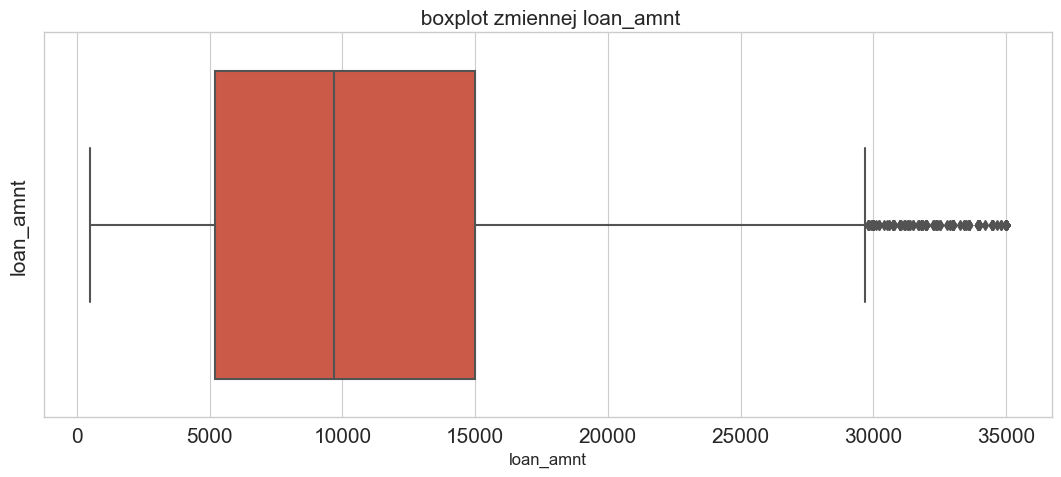

In [179]:
fig, (ax1)=plt.subplots(figsize=(13,5))

#boxplot
sns.boxplot(x='loan_amnt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('loan_amnt', fontsize=15)
ax1.set_title(' boxplot zmiennej loan_amnt', fontsize=15)
ax1.tick_params(labelsize=15)

In [180]:
# Najwięcej osób wnioskuje o kwoty w zakresie 5100-15000
# Mediana jest przesunięta w stronę dolnej granicy 
# Outliery powyżej 29500

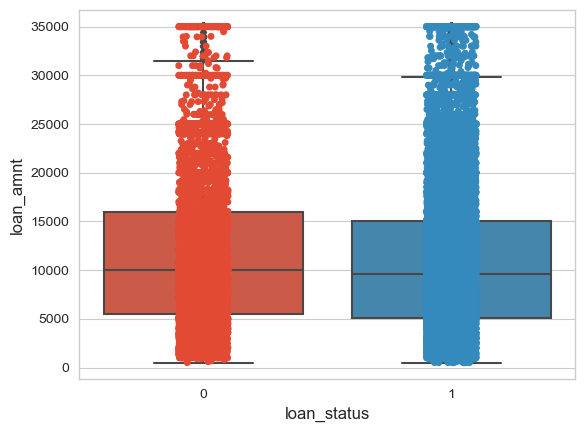

In [181]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='loan_amnt',data=df)
ax = sns.stripplot(x="loan_status", y="loan_amnt",data=df)

In [182]:
# Większość osób spłacających kredyty ma niższy nieco niższy zakres wartości wnioskowanych kredytów

In [183]:
# Osoby niespłacające kredytów wnioskują o wyższe kwoty kredytu

df[['loan_amnt', 'loan_status']].groupby(['loan_status'], as_index=False).mean().sort_values(by='loan_amnt', ascending=False)

,loan_status,loan_amnt
0,0,11837.428
1,1,10956.503


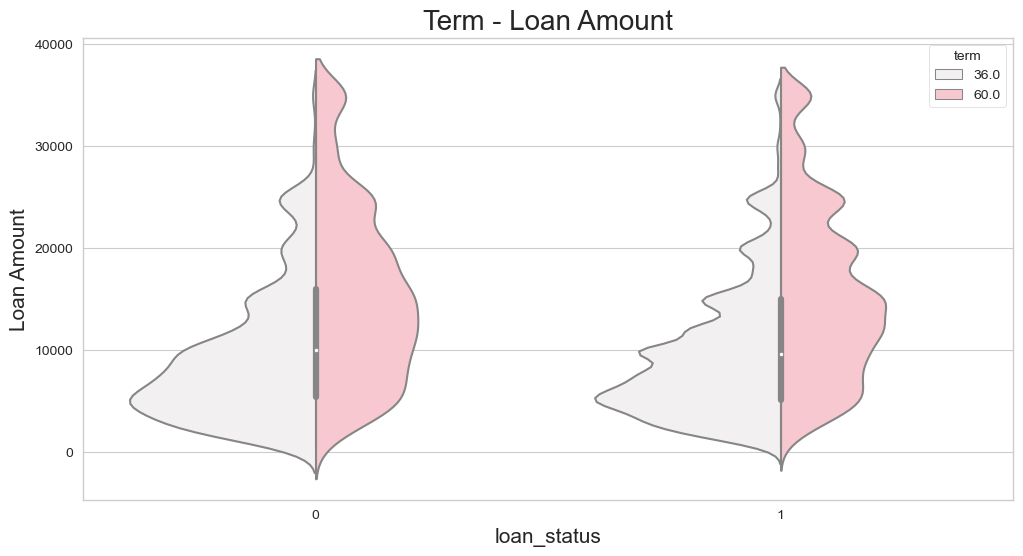

In [184]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="loan_status",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("loan_status", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [185]:
# Osoby zaciągające kredyt na dłyższy okres (60mcy), wnioskują o wyższe kwoty kredytu (w obydwu grupach)

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

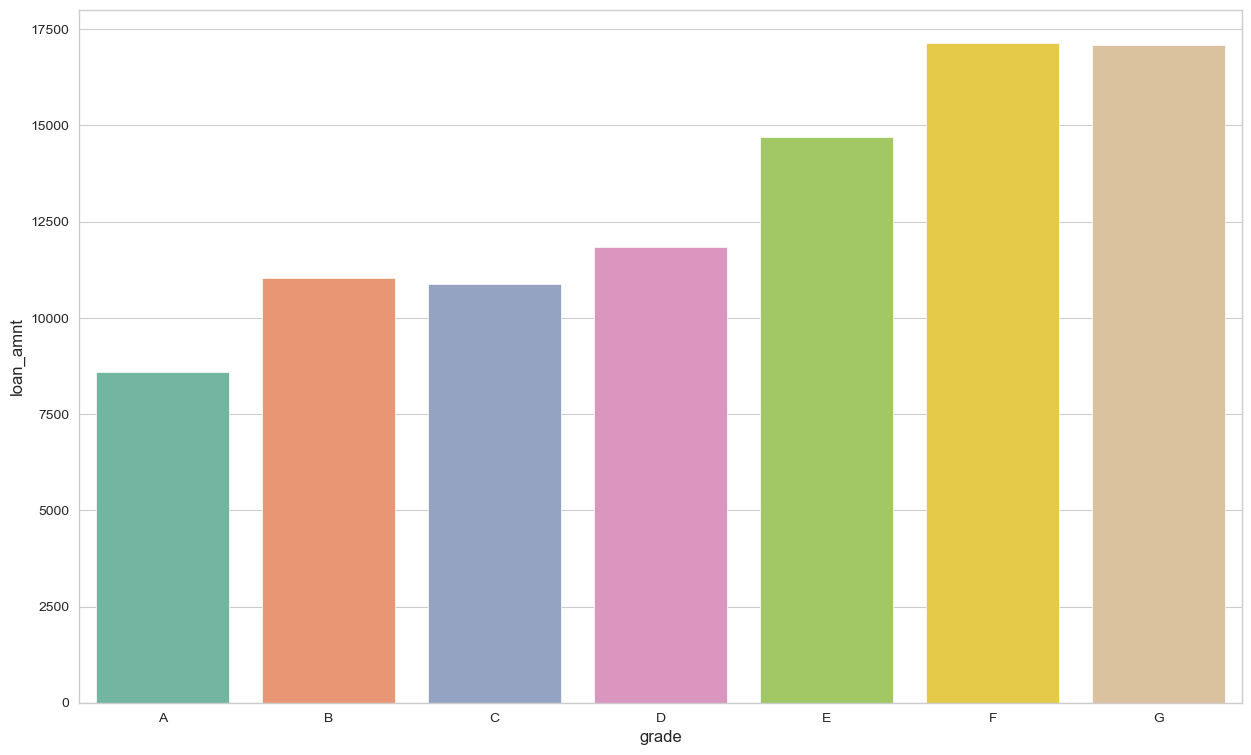

In [186]:
#Chcę sprawdzić, jak wyglądają kwoty kredytu dla poszczólnych grup (zmienna 'grade')

group = df.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')

In [187]:
#Osoby z grupy najwyższego ryzyka (G) zadłużają się na wyższe kwoty. Im wyższa grupa ryzyka, tym większe kwoty kredytu

### funded_amnt

In [188]:
statystyka(df, 'funded_amnt')

Minimum:  500.0
Maximum:  35000.0
Mean value:  10821.557034041753
Median value:  9600.0
Standard deviation:  7146.833116763312


In [189]:
kwartyle(df, 'funded_amnt')

1st Quartile (Q1) is:  5000.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  10000.0


In [190]:
gorny_dolny_outlier(df, 'funded_amnt', 5000, 15000)

Lower outliers:  -10000.0
Upper outliers:  30000.0


In [191]:
liczba_outlierow(df, 'funded_amnt', 30000.0, -10000.0)

Liczba outlierow upper :  691
Liczba outlierow lower :  0
% outlierow upper:  1.6245063005454203 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


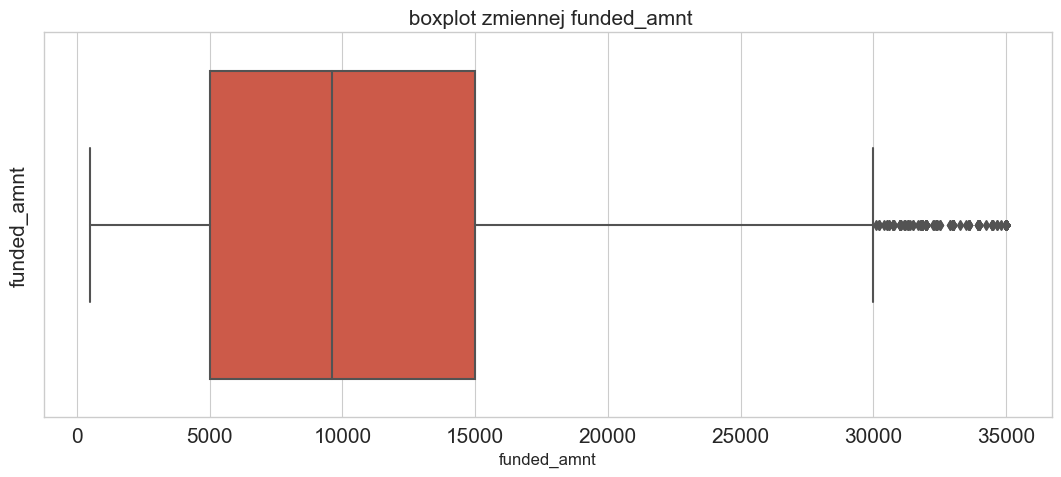

In [192]:
fig, (ax1)=plt.subplots(figsize=(13,5))

#boxplot
sns.boxplot(x='funded_amnt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('funded_amnt', fontsize=15)
ax1.set_title(' boxplot zmiennej funded_amnt', fontsize=15)
ax1.tick_params(labelsize=15)

In [193]:
# Najwięcej osób otrzymuje kwoty w zakresie 5000-15000
# Mediana jest przesunięta w stronę dolnej granicy 
# Outliery powyżej 30000

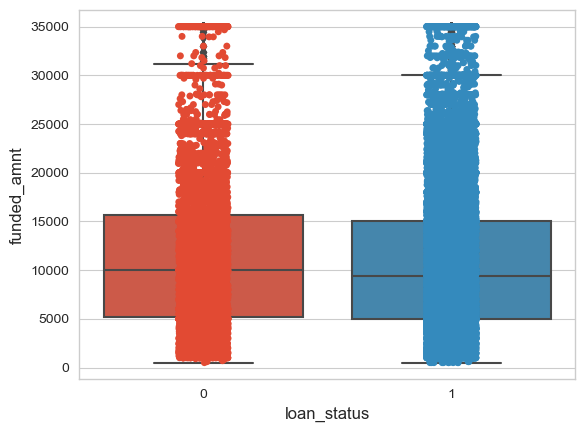

In [194]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='funded_amnt',data=df)
ax = sns.stripplot(x="loan_status", y="funded_amnt",data=df)

In [195]:
# Większość osób spłacających kredyty ma niższy nieco niższy zakres wartości przyznanych kredytów

In [196]:
# Osoby niespłacające kredytów zadłużają się na wyższe kwoty kredytu

df[['funded_amnt', 'loan_status']].groupby(['loan_status'], as_index=False).mean().sort_values(by='funded_amnt', ascending=False)

,loan_status,funded_amnt
0,0,11492.190
1,1,10702.104


### INSTALLMENT

In [197]:
statystyka(df, 'installment')

Minimum:  15.67
Maximum:  1305.19
Mean value:  322.6220063005406
Median value:  277.69
Standard deviation:  208.92487412535752


In [198]:
kwartyle(df, 'installment')

1st Quartile (Q1) is:  165.53500000000003
3st Quartile (Q3) is:  428.155
Interquartile range (IQR) is  262.61999999999995


In [199]:
gorny_dolny_outlier(df, 'installment', 165.54, 428.16)

Lower outliers:  -228.39000000000001
Upper outliers:  822.09


In [200]:
liczba_outlierow(df, 'installment', 822, -228.4)

Liczba outlierow upper :  1393
Liczba outlierow lower :  0
% outlierow upper:  3.2748730487116795 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


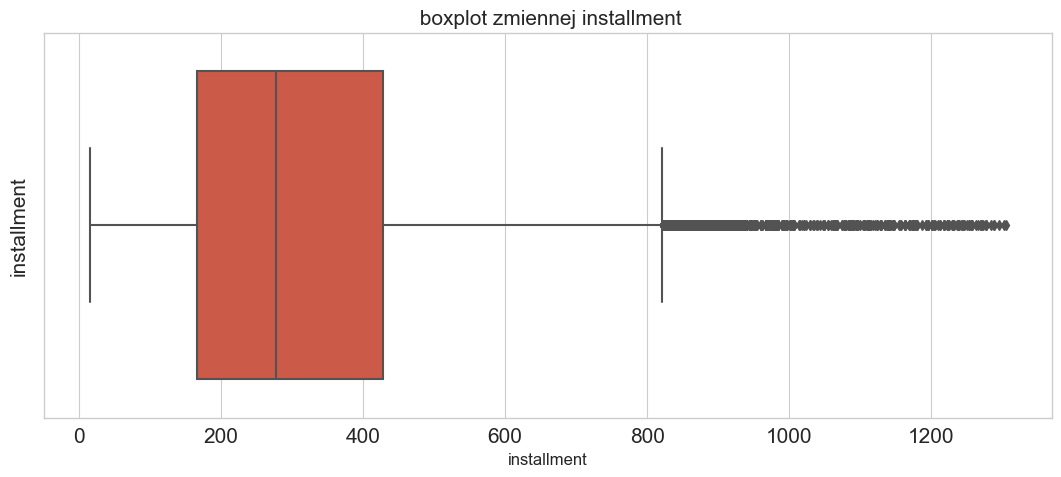

In [201]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='installment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('installment', fontsize=15)
ax1.set_title(' boxplot zmiennej installment', fontsize=15)
ax1.tick_params(labelsize=15)

In [202]:
# Najwięcej osób płaci raty w zakresie 180-410
# Mediana jest przesunięta w stronę dolnej granicy 
# Outliery powyżej 810

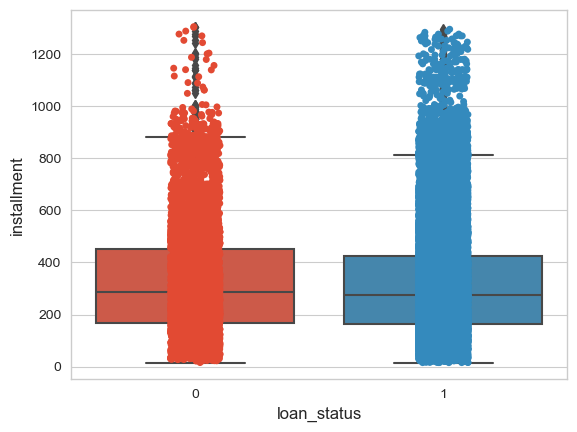

In [203]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='installment',data=df)
ax = sns.stripplot(x="loan_status", y="installment",data=df)

In [205]:
#Kredytobiorcy, którzy niespłacają kredytów mają nieco wyższe raty kredytu.

pd.pivot_table(df, index='loan_status', values="installment", aggfunc='mean')

,installment
loan_status,
0,333.065
1,320.762


### INQUIERIES IN THE LAST 6 MONTHS

In [206]:
df['inq_last_6mths'].dtypes

dtype('O')

In [207]:
df['inq_last_6mths'] = pd.to_numeric(df['inq_last_6mths'], errors='coerce').convert_dtypes() 

In [208]:
statystyka(df, 'inq_last_6mths')

Minimum:  0
Maximum:  33
Mean value:  1.08066108707918
Median value:  1.0
Standard deviation:  1.5271859659180456


In [209]:
kwartyle(df, 'inq_last_6mths')

1st Quartile (Q1) is:  0
3st Quartile (Q3) is:  2
Interquartile range (IQR) is  2.0


In [210]:
gorny_dolny_outlier(df, 'inq_last_6mths', 0.0, 2.0)

Lower outliers:  -3.0
Upper outliers:  5.0


In [211]:
liczba_outlierow(df, 'inq_last_6mths', 5.0, -3.0)

Liczba outlierow upper :  781
Liczba outlierow lower :  0
% outlierow upper:  1.836091781079556 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


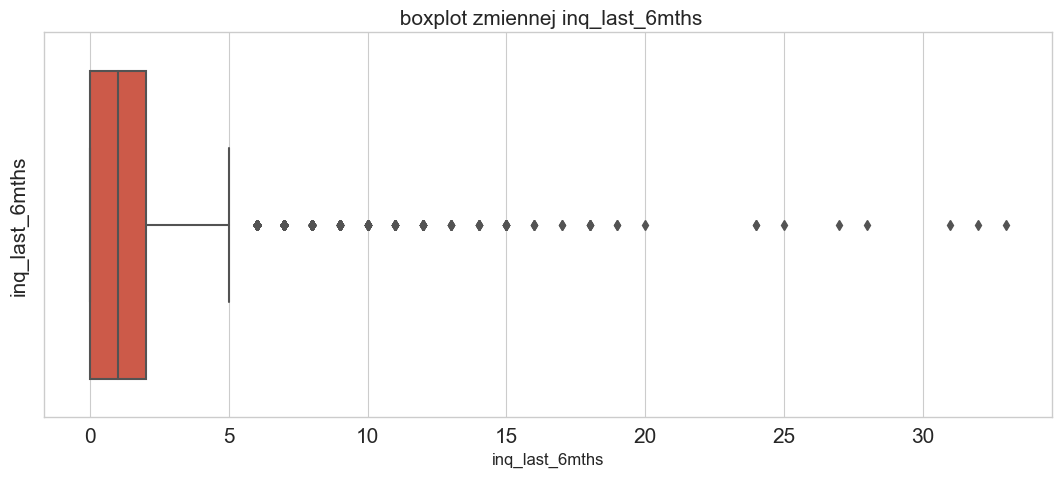

In [212]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='inq_last_6mths',data=df,orient='v',ax=ax1)
ax1.set_ylabel('inq_last_6mths', fontsize=15)
ax1.set_title(' boxplot zmiennej inq_last_6mths', fontsize=15)
ax1.tick_params(labelsize=15)

In [213]:
# Najwięcej osób składa wnioski od 0 do 2
# Mediana przecina pudełko na pół - rozkład normalny
# Outliery dla więcej niż 5 składanych wniosków kredytowych

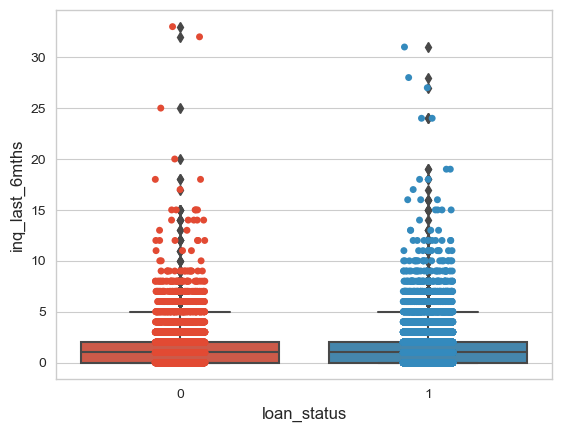

In [214]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='inq_last_6mths',data=df)
ax = sns.stripplot(x="loan_status", y="inq_last_6mths",data=df)

In [215]:
# Zakres wartości jest porównywalny dla obu grup

<AxesSubplot:xlabel='grade', ylabel='inq_last_6mths'>

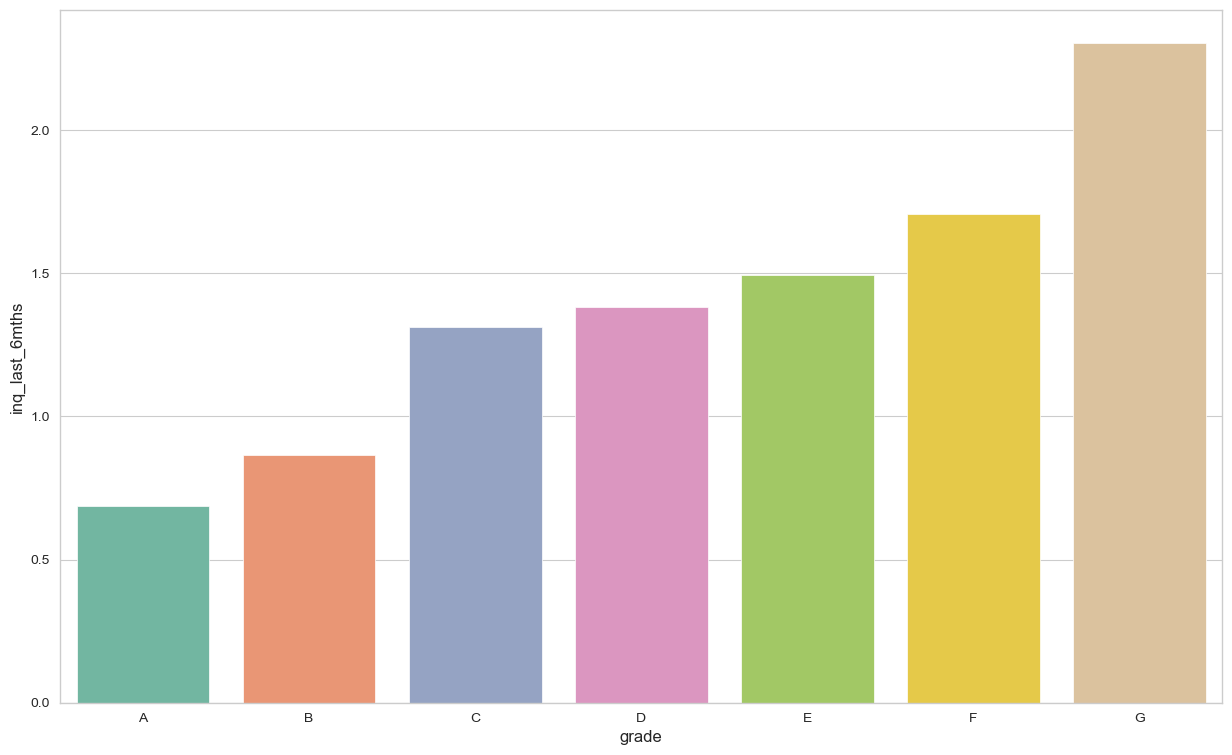

In [216]:
#Chcę sprawdzić, ile wniosków kredytowych składanych jest w poszczególnych grupach (zmienna 'grade')

group = df.groupby("grade").mean()
avg_loan = group['inq_last_6mths'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='inq_last_6mths', data=avg_loan, palette='Set2')

In [217]:
#Im wyższa grupa ryzyka, tym więcej wniosków kredytowych jest składanych

In [218]:
df['inq_last_6mths'] = pd.to_numeric(df['inq_last_6mths'])
df['inq_last_6mths'] = df['inq_last_6mths'].astype(float)

In [219]:
#Osoby częściej składające wnioski o przyznanie kredytu, częściej mają problemy z jego spłatą

pd.pivot_table(df, index='loan_status', values='inq_last_6mths', aggfunc='mean')

,inq_last_6mths
loan_status,
0,1.482
1,1.009


In [220]:
df['inq_last_6mths'].value_counts()

0.000     19687
1.000     11247
2.000      5987
3.000      3182
4.000      1056
5.000       596
6.000       339
7.000       182
8.000       115
9.000        50
10.000       24
11.000       15
12.000       15
15.000        9
13.000        6
14.000        6
18.000        4
16.000        3
17.000        2
24.000        2
19.000        2
32.000        1
33.000        1
31.000        1
28.000        1
25.000        1
27.000        1
20.000        1
Name: inq_last_6mths, dtype: int64

### FICO_RANGE_HIGH i FICO_RANGE_LOW

In [221]:
df[['fico_range_low','fico_range_high']].describe()

,fico_range_low,fico_range_high
count,42536.000,42536.000
mean,713.052,717.052
std,36.188,36.188
min,610.000,614.000
25%,685.000,689.000
50%,710.000,714.000
75%,740.000,744.000
max,825.000,829.000


In [222]:
# Wyniki dla obywdu zmiennych są bardzo podobne

In [223]:
df[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.000,1.000
fico_range_high,1.000,1.000


In [224]:
# Zmienne są silnie skorelowane, więc do analizy potrzebuję tylko jednej. 
# Stworzę nową kolumnę 'fico', która będzie zawierała średnie wartości obydwu

In [225]:
df['fico'] = (df['fico_range_low'] + df['fico_range_high'])/2

In [226]:
df.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

In [227]:
statystyka(df, 'fico')

Minimum:  612.0
Maximum:  827.0
Mean value:  715.0524731991725
Median value:  712.0
Standard deviation:  36.18801616454543


In [228]:
kwartyle(df, 'fico')

1st Quartile (Q1) is:  687.0
3st Quartile (Q3) is:  742.0
Interquartile range (IQR) is  55.0


In [229]:
gorny_dolny_outlier(df, 'fico',687, 742)

Lower outliers:  604.5
Upper outliers:  824.5


In [230]:
liczba_outlierow(df, 'fico', 824.5, 604.5)

Liczba outlierow upper :  3
Liczba outlierow lower :  0
% outlierow upper:  0.00705284935113786 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


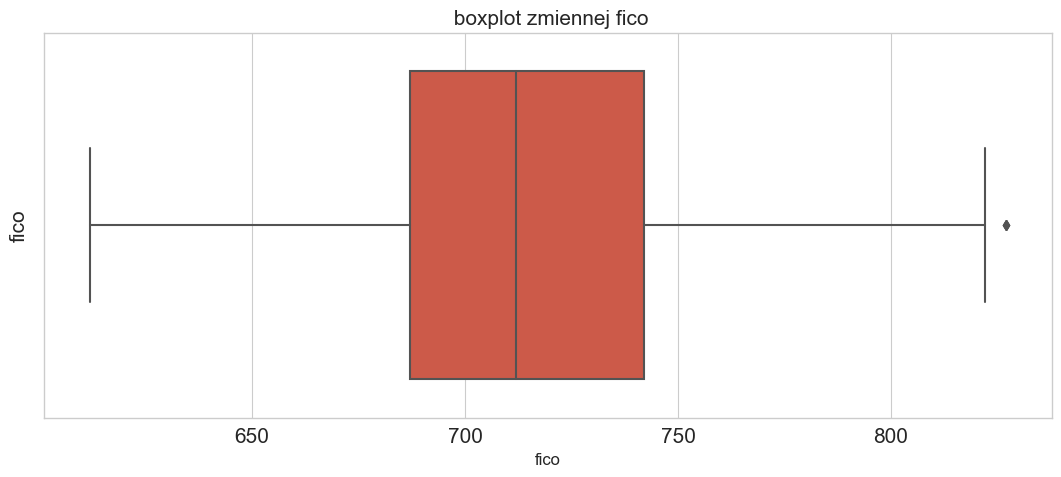

In [231]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='fico',data=df,orient='v',ax=ax1)
ax1.set_ylabel('fico', fontsize=15)
ax1.set_title(' boxplot zmiennej fico', fontsize=15)
ax1.tick_params(labelsize=15)

In [232]:
# Najwięcej osób ma wskaźnik fico w zakresie 685-745
# Mediana jest przesunięta w stronę dolnej granicy
# Outliery powyżej 825

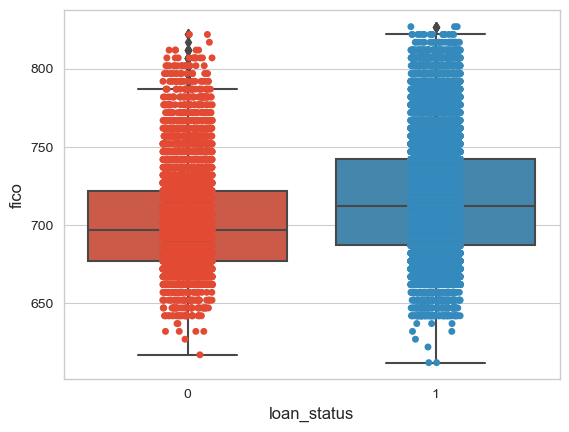

In [233]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='loan_status',y='fico',data=df)
ax = sns.stripplot(x="loan_status", y="fico",data=df)

In [234]:
# Osoby spłacjące mają większy zakres wartości 'fico'. Większość osób z tej grupy ma wyższy wskaźnik w porównaniu z grupą 0

In [235]:
#Osoby niespłącające kredytów mają niższy wskaźnik 'fico'

pd.pivot_table(df, index='loan_status', values='fico', aggfunc='mean')

,fico
loan_status,
0,702.884
1,717.220


In [236]:
df[['fico','int_rate','term']].corr()

,fico,int_rate,term
fico,1.000,-0.703,0.000
int_rate,-0.703,1.000,0.429
term,0.000,0.429,1.000


In [237]:
#Wskaźnik FICO ma wysoką ujemną korelację z wysokością oprocentowania - im wyższy FICO tym niższe oprocentowanie.

## Zmienne kategoryczne

## GRADE

In [238]:
df.groupby(['grade'])['int_rate'].mean()

grade
A   0.073
B   0.110
C   0.135
D   0.156
E   0.174
F   0.193
G   0.205
Name: int_rate, dtype: float64

In [239]:
#Wraz ze wzrostem grupy ryzyka, wzrasta oprocentowanie kredytu.

In [240]:
pd.pivot_table(df, index="loan_status", columns="grade", aggfunc="size")

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,610,1518,1504,1327,883,416,173
1,9573,10872,7236,4689,2511,885,339


In [241]:
pd.crosstab(df['grade'], df['loan_status'], normalize='index')

loan_status,0,1
grade,,
A,0.060,0.940
B,0.123,0.877
C,0.172,0.828
D,0.221,0.779
E,0.260,0.740
F,0.320,0.680
G,0.338,0.662


In [242]:
#Wraz ze wzrostem grupy ryzyka, wzrasta również odsetek osób niespłacających kredytów

### HOME OWNERSHIP

In [243]:
df['home_ownership'].value_counts()

RENT        20182
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [244]:
#Kategorie 'NONE', 'OTHER' zawierają małe ilości kredytobiorców, dlatego połączę je w jednej kolumnie


df['home_ownership'].replace(['NONE', 'OTHER'], 'OTHERS', inplace=True)

In [245]:
df['home_ownership'].value_counts()

RENT        20182
MORTGAGE    18959
OWN          3251
OTHERS        144
Name: home_ownership, dtype: int64

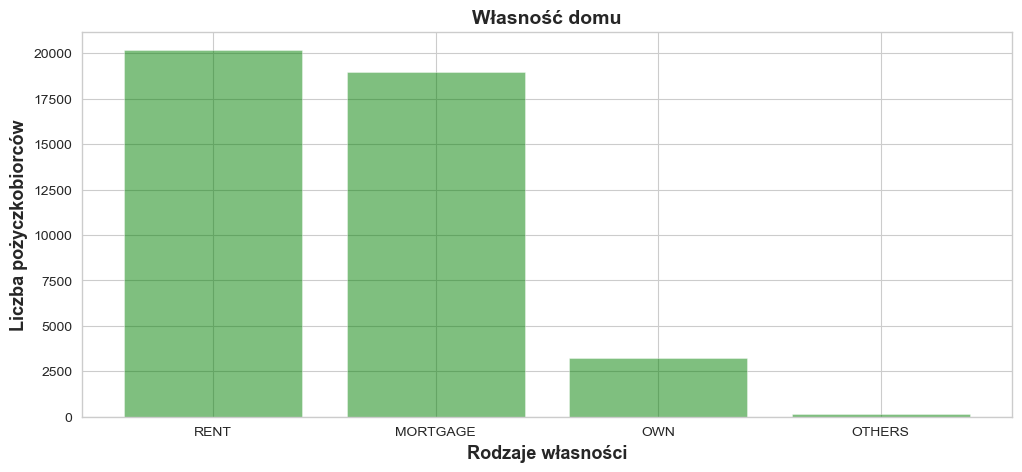

In [246]:
A = df['home_ownership'].value_counts().sort_values(ascending=False)[:5]
f, ax = plt.subplots(figsize=(12,5))
plt.bar(A.index, A.values, color='green', alpha=0.5)
plt.title('Własność domu', fontsize=14.0, fontweight='bold')
plt.xlabel('Rodzaje własności', fontsize=13.0, fontweight='bold')
plt.ylabel("Liczba pożyczkobiorców", fontsize=13.0, fontweight='bold')
plt.show()

In [247]:
#Najwięcej osób biorących kredyty wynajmuje mieszkanie

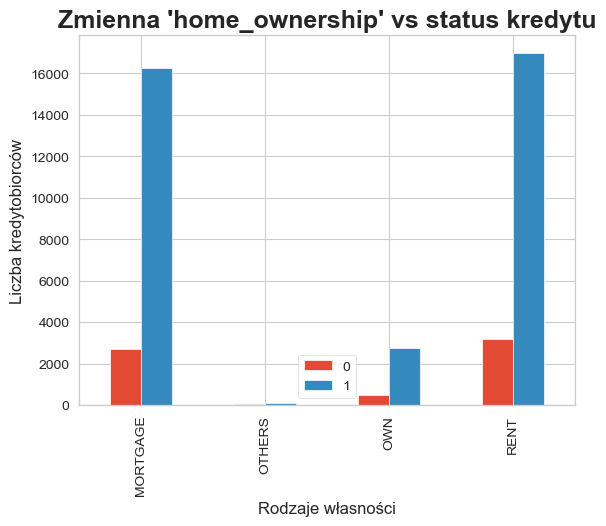

In [248]:
pd.crosstab(df["home_ownership"], df['loan_status']).plot(kind="bar")
plt.title("Zmienna 'home_ownership' vs status kredytu", fontsize=18.0, fontweight='bold')
plt.xlabel("Rodzaje własności")
plt.ylabel("Liczba kredytobiorców")
plt.legend(loc="best")
plt.show()

In [249]:
pd.crosstab(df['home_ownership'], df['loan_status'], normalize='index')

loan_status,0,1
home_ownership,,
MORTGAGE,0.142,0.858
OTHERS,0.208,0.792
OWN,0.152,0.848
RENT,0.159,0.841


In [250]:
#Osoby mające kredyt hipoteczny radzą sobie nieco lepiej niż osoby wynajmujące i posiadające własne domy

In [251]:
#Oprocentowanie z podziałem na poszczególne rodzaje z uwzględnieniem statusu kredytu

pd.crosstab(df['home_ownership'], df['loan_status'], values=df['int_rate'], aggfunc='mean')

loan_status,0,1
home_ownership,,
MORTGAGE,0.139,0.116
OTHERS,0.139,0.122
OWN,0.138,0.116
RENT,0.139,0.121


In [252]:
#Osoby niespłacające mają wyższe oprocentowanie w każdym rodzaju własności
#Samo oprocentowanie nie różni się zbytnio w poszczególnych rodzajach własności

In [253]:
#Tabela przedstawia wysokość oprocentowania kredytu z podziałem na grupy ('grade') i status pożyczki dla każdego rodzaju własności

A = pd.crosstab(df['grade'],[df['home_ownership'], df['loan_status']], values=df['int_rate'], aggfunc='mean')
A

home_ownership MORTGAGE       OTHERS         OWN        RENT      
loan_status           0     1      0     1     0     1     0     1
grade                                                             
A                 0.075 0.072  0.088 0.085 0.075 0.073 0.077 0.074
B                 0.111 0.110  0.111 0.113 0.111 0.111 0.111 0.110
C                 0.135 0.135  0.127 0.128 0.135 0.136 0.135 0.135
D                 0.156 0.157  0.156 0.144 0.157 0.156 0.157 0.155
E                 0.176 0.175  0.154 0.160 0.177 0.175 0.173 0.172
F                 0.193 0.195  0.168 0.166 0.197 0.191 0.194 0.190
G                 0.201 0.205  0.190 0.189 0.201 0.205 0.208 0.205

In [254]:
# Ta tabela potwierdza tezę, że osoby z grupy wyższego ryzyka otrzymują wyższe oprocentowanie (rośnie ono wraz ze wzrostem grupy)
# Wysokość oprocentowania nie różni się też między poszczególnymi rodzajami własności

### PURPOSE

In [255]:
df['purpose'].value_counts().sort_values(ascending=False)

debt_consolidation    19777
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

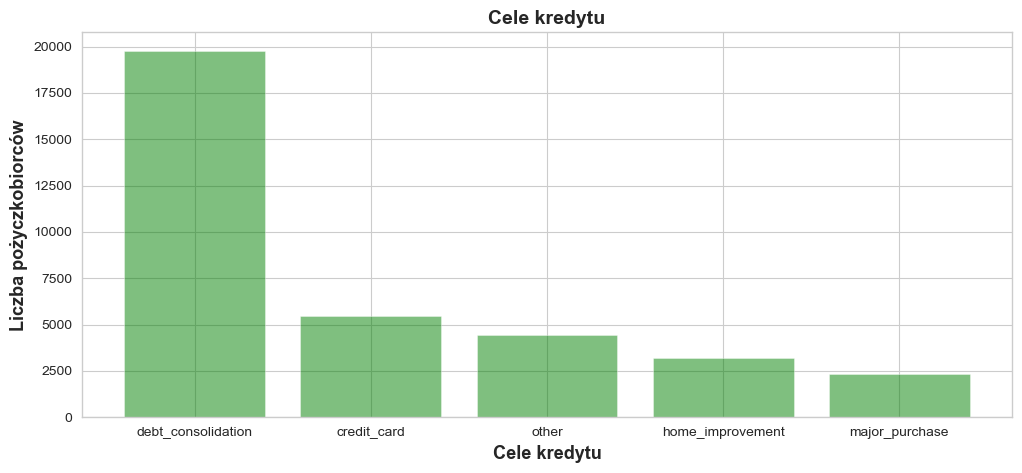

In [256]:
A = df['purpose'].value_counts().sort_values(ascending=False)[:5]
f, ax = plt.subplots(figsize=(12,5))
plt.bar(A.index, A.values, color='green', alpha=0.5)
plt.title('Cele kredytu', fontsize=14.0, fontweight='bold')
plt.xlabel('Cele kredytu', fontsize=13.0, fontweight='bold')
plt.ylabel('Liczba pożyczkobiorców', fontsize=13.0, fontweight='bold')
plt.show()

In [257]:
#Najwięcej osób decyduje się na kredyt konsolidacyjny

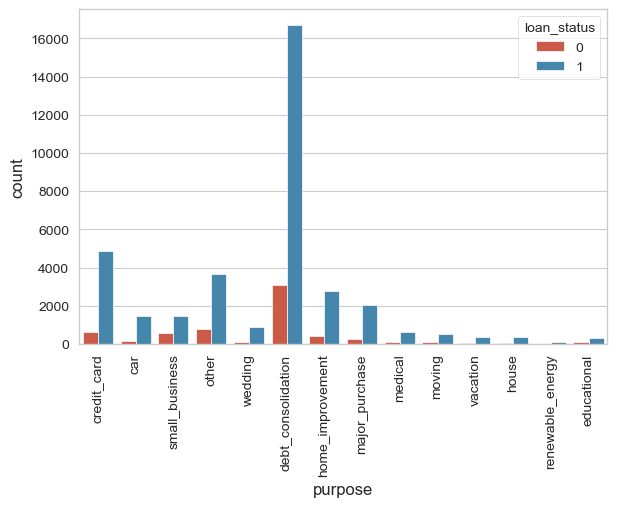

In [258]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [259]:
# Chcę sprawdzić, jaki odsetek kredytów jest spłacany w każdum celu kredytowym

pd.crosstab(df['purpose'], df['loan_status'], normalize='index')

loan_status,0,1
purpose,,
car,0.107,0.893
credit_card,0.113,0.887
debt_consolidation,0.156,0.844
educational,0.209,0.791
home_improvement,0.132,0.868
house,0.164,0.836
major_purchase,0.106,0.894
medical,0.170,0.830
moving,0.170,0.830


In [260]:
# Najwyższą spłacalność mają kredyty zaciągnięte na duże zakupy, kupno samochodu, wesele, karty kredytowe.
# Najniższą - małe biznesy, kredyty na edukację oraz odnawialne źródła energii

### TERM

In [261]:
pd.crosstab(df['term'], df['loan_status'])

loan_status,0,1
term,,
36.000,3876,27659
60.000,2555,8446


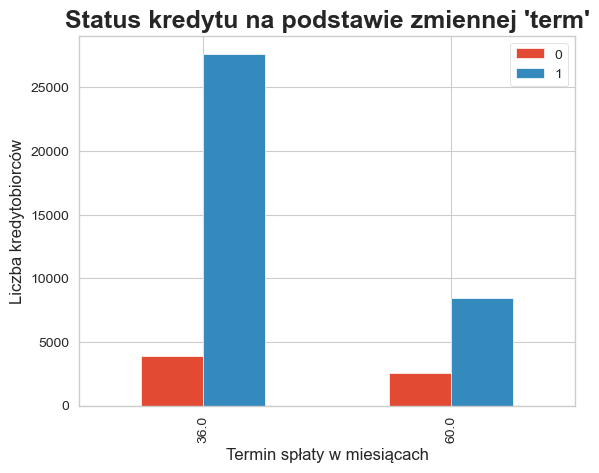

In [262]:
pd.crosstab(df['term'], df['loan_status']).plot(kind="bar")
plt.title("Status kredytu na podstawie zmiennej 'term'", fontsize=18.0, fontweight='bold')
plt.xlabel("Termin spłaty w miesiącach")
plt.ylabel("Liczba kredytobiorców")
plt.legend(loc="best")
plt.show()

In [263]:
#Chcę sprawdzić, jak wygląda spłacalność kredytu dla obu wartości

In [264]:
pd.crosstab(df['term'], df['loan_status'], normalize='index')

loan_status,0,1
term,,
36.000,0.123,0.877
60.000,0.232,0.768


In [265]:
#Osoby z dłuższym kredytem częściej nie spłacają pożyczek

## Pytania do projektu

### 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

In [266]:
# Wg moich obserwacji wyższy wskaźnik FICO będzie pozytywnie wpływał na spłatę kredytu.

In [267]:
# Osoby niespłacające kredytów (0) mają niższy wskaźnik FICO

pd.pivot_table(df, index='loan_status', values='fico', aggfunc='mean')

,fico
loan_status,
0,702.884
1,717.220


### 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO?


In [277]:
# Najwcześniej otwarte historie kredytowe mają 100% spłacalność
# Widać, że długość wieku kredytowego może mieć wpływa na spłacalność kredytów

In [278]:
pd.crosstab(df['earliest_cr_line'],df['loan_status'], normalize = 'index')

loan_status,0,1
earliest_cr_line,,
1946.0,0.000,1.000
1950.0,0.000,1.000
1954.0,0.000,1.000
1956.0,0.000,1.000
1959.0,0.000,1.000
1961.0,0.000,1.000
1962.0,0.400,0.600
1963.0,0.167,0.833
1964.0,0.000,1.000


In [279]:
df['earliest_cr_line'] = pd.to_numeric(df['earliest_cr_line'])
df['earliest_cr_line'] = df['earliest_cr_line'].astype(float)

In [280]:
# Aby potwierdzić moje przypuszczenia wykorzystam Chi2 test

In [281]:
df2=pd.crosstab(df['earliest_cr_line'],df['loan_status'])
print(df2)

loan_status         0     1
earliest_cr_line           
1946.000            0     1
1950.000            0     1
1954.000            0     2
1956.000            0     1
1959.000            0     2
1961.000            0     2
1962.000            2     3
1963.000            2    10
1964.000            0     9
1965.000            1     8
1966.000            2     9
1967.000            5    13
1968.000            5    18
1969.000            4    37
1970.000            7    42
1971.000            8    42
1972.000            9    47
1973.000           13    56
1974.000            7    64
1975.000           10    77
1976.000           11   101
1977.000           15   109
1978.000           25   148
1979.000           34   144
1980.000           16   171
1981.000           24   183
1982.000           35   203
1983.000           57   303
1984.000           59   374
1985.000           73   413
1986.000           61   472
1987.000           94   570
1988.000          120   663
1989.000          13

In [282]:
df2.values 

array([[   0,    1],
       [   0,    1],
       [   0,    2],
       [   0,    1],
       [   0,    2],
       [   0,    2],
       [   2,    3],
       [   2,   10],
       [   0,    9],
       [   1,    8],
       [   2,    9],
       [   5,   13],
       [   5,   18],
       [   4,   37],
       [   7,   42],
       [   8,   42],
       [   9,   47],
       [  13,   56],
       [   7,   64],
       [  10,   77],
       [  11,  101],
       [  15,  109],
       [  25,  148],
       [  34,  144],
       [  16,  171],
       [  24,  183],
       [  35,  203],
       [  57,  303],
       [  59,  374],
       [  73,  413],
       [  61,  472],
       [  94,  570],
       [ 120,  663],
       [ 136,  795],
       [ 148,  965],
       [ 166,  873],
       [ 159,  996],
       [ 225, 1385],
       [ 316, 1850],
       [ 348, 1944],
       [ 348, 2078],
       [ 422, 2200],
       [ 475, 2591],
       [ 493, 2659],
       [ 551, 2915],
       [ 398, 2269],
       [ 297, 1762],
       [ 254,

In [283]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [284]:
stat, p, dof, expected = chi2_contingency(df2)

In [285]:
print('dof=%d' % dof)
print(expected)

dof=52
[[1.51189581e-01 8.48810419e-01]
 [1.51189581e-01 8.48810419e-01]
 [3.02379161e-01 1.69762084e+00]
 [1.51189581e-01 8.48810419e-01]
 [3.02379161e-01 1.69762084e+00]
 [3.02379161e-01 1.69762084e+00]
 [7.55947903e-01 4.24405210e+00]
 [1.81427497e+00 1.01857250e+01]
 [1.36070623e+00 7.63929377e+00]
 [1.36070623e+00 7.63929377e+00]
 [1.66308539e+00 9.33691461e+00]
 [2.72141245e+00 1.52785875e+01]
 [3.47736035e+00 1.95226396e+01]
 [6.19877280e+00 3.48012272e+01]
 [7.40828945e+00 4.15917106e+01]
 [7.55947903e+00 4.24405210e+01]
 [8.46661651e+00 4.75333835e+01]
 [1.04320811e+01 5.85679189e+01]
 [1.07344602e+01 6.02655398e+01]
 [1.31534935e+01 7.38465065e+01]
 [1.69332330e+01 9.50667670e+01]
 [1.87475080e+01 1.05252492e+02]
 [2.61557974e+01 1.46844203e+02]
 [2.69117453e+01 1.51088255e+02]
 [2.82724516e+01 1.58727548e+02]
 [3.12962432e+01 1.75703757e+02]
 [3.59831202e+01 2.02016880e+02]
 [5.44282490e+01 3.05571751e+02]
 [6.54650884e+01 3.67534912e+02]
 [7.34781362e+01 4.12521864e+02]
 [8

In [286]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [287]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [288]:
#Test potwierdza, że zmienne 'earliest_cr_line_cat' i 'loan_status' są zależne od siebie

In [289]:
# Zależność między 'fico' a 'earliest_cr_line'

In [290]:
df['earliest_cr_line'].corr(df['fico'])

-0.23495172135127684

In [291]:
# 'earliest_cr_line' i 'fico są one skorelowanie ujemnie - czyli im poźniejszy rok powstania historii kredytowej, 
# tym wskaźniki FICO będą niższe.

# Im niższy wskaźnik FICO, tym większe ryzyko kredytowe

### 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [301]:
# Osoby spłacające kredyt hipoteczny mają najwyższy odsetek spłaconych kredytów ze wszystkich grup zmiennej 'home_ownership'

In [302]:
pd.crosstab(df['home_ownership'],df['loan_status'], normalize = 'index')

loan_status,0,1
home_ownership,,
MORTGAGE,0.142,0.858
OTHERS,0.208,0.792
OWN,0.152,0.848
RENT,0.159,0.841


In [303]:
# Aby potwierdzić moje przypuszczenia wykorzystam Chi2 test

In [304]:
## Dodam kolumnę z informacją, czy pożyczkobiorca posiada kredyt hipoteczny, bądź nie (1 - tak, 0 - nie)

In [305]:
def hipoteka(df):
    if (df['home_ownership'] == 'MORTGAGE'):
        return 1
    else:
        return 0

In [306]:
df['hipoteka'] = df.apply(hipoteka, axis=1)

In [307]:
df['hipoteka'].value_counts()

0    23577
1    18959
Name: hipoteka, dtype: int64

In [308]:
df3=pd.crosstab(df['hipoteka'],df['loan_status'])
print(df1)

loan_status    0     1
fico                  
612.000        0     2
617.000        1     0
622.000        0     1
627.000        1     1
632.000        4     2
637.000        2     3
642.000       29    73
647.000       37    75
652.000       38    93
657.000       39    88
662.000      366  1218
667.000      447  1374
672.000      407  1447
677.000      389  1605
682.000      438  1790
687.000      408  1902
692.000      379  1817
697.000      388  1814
702.000      361  1906
707.000      335  1635
712.000      255  1517
717.000      261  1630
722.000      246  1703
727.000      277  1614
732.000      201  1469
737.000      205  1448
742.000      164  1326
747.000      146  1173
752.000      124  1170
757.000      109   991
762.000       85   899
767.000       68   724
772.000       48   751
777.000       32   622
782.000       43   530
787.000       25   381
792.000       22   400
797.000       17   321
802.000       15   241
807.000       11   182
812.000        5   120
817.000    

In [309]:
df3.values 

array([[ 3732, 19845],
       [ 2699, 16260]], dtype=int64)

In [310]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [311]:
stat, p, dof, expected = chi2_contingency(df3)

In [312]:
print('dof=%d' % dof)
print(expected)

dof=1
[[ 3564.59674158 20012.40325842]
 [ 2866.40325842 16092.59674158]]


In [313]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [314]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [315]:
# Test potwierdza, że argumenty są zależne od siebie

### 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [316]:
#Osoby niespłacające kredytów mają średnio niższy roczny dochód

In [317]:
pd.pivot_table(df, index='loan_status', values='annual_inc', aggfunc='mean')

,annual_inc
loan_status,
0,63366.871
1,70162.845


### 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [327]:
#Chcę sprawdzić, czy długość zatrudnienia wpływa na spłatę kredytu.

In [328]:
for rok_pracy in df.emp_length.unique():
    print(f"{rok_pracy} lat pracy:")
    print(f"{df[df.emp_length == rok_pracy].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10 lat pracy:
1   0.833
0   0.167
Name: loan_status, dtype: float64
0 lat pracy:
1   0.852
0   0.148
Name: loan_status, dtype: float64
1 lat pracy:
1   0.847
0   0.153
Name: loan_status, dtype: float64
3 lat pracy:
1   0.856
0   0.144
Name: loan_status, dtype: float64
8 lat pracy:
1   0.851
0   0.149
Name: loan_status, dtype: float64
9 lat pracy:
1   0.866
0   0.134
Name: loan_status, dtype: float64
4 lat pracy:
1   0.857
0   0.143
Name: loan_status, dtype: float64
5 lat pracy:
1   0.853
0   0.147
Name: loan_status, dtype: float64
6 lat pracy:
1   0.852
0   0.148
Name: loan_status, dtype: float64
2 lat pracy:
1   0.862
0   0.138
Name: loan_status, dtype: float64
7 lat pracy:
1   0.843
0   0.157
Name: loan_status, dtype: float64


In [329]:
pd.crosstab(df['emp_length'], df['loan_status'], normalize = 'index')

loan_status,0,1
emp_length,,
0,0.148,0.852
1,0.153,0.847
2,0.138,0.862
3,0.144,0.856
4,0.143,0.857
5,0.147,0.853
6,0.148,0.852
7,0.157,0.843
8,0.149,0.851


In [330]:
# Wynika z tego, że lata pracy nie wpływają znacząco na spłatę kredytu.
# Rozkład wartości jest bardzo podobny dla wszystkich lat pracy.
# O dziwo, najgorzej radzą sobie osoby najdłużej pracujące.

In [331]:
# Aby potwierdzić moje przypuszczenia wykorzystam Chi2 test

In [332]:
df5=pd.crosstab(df['emp_length'],df['loan_status'])
print(df1)

loan_status    0     1
fico                  
612.000        0     2
617.000        1     0
622.000        0     1
627.000        1     1
632.000        4     2
637.000        2     3
642.000       29    73
647.000       37    75
652.000       38    93
657.000       39    88
662.000      366  1218
667.000      447  1374
672.000      407  1447
677.000      389  1605
682.000      438  1790
687.000      408  1902
692.000      379  1817
697.000      388  1814
702.000      361  1906
707.000      335  1635
712.000      255  1517
717.000      261  1630
722.000      246  1703
727.000      277  1614
732.000      201  1469
737.000      205  1448
742.000      164  1326
747.000      146  1173
752.000      124  1170
757.000      109   991
762.000       85   899
767.000       68   724
772.000       48   751
777.000       32   622
782.000       43   530
787.000       25   381
792.000       22   400
797.000       17   321
802.000       15   241
807.000       11   182
812.000        5   120
817.000    

In [333]:
df5.values 

array([[ 751, 4311],
       [ 551, 3044],
       [ 654, 4089],
       [ 630, 3734],
       [ 522, 3127],
       [ 509, 2949],
       [ 352, 2023],
       [ 295, 1580],
       [ 238, 1354],
       [ 180, 1161],
       [1749, 8733]], dtype=int64)

In [334]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [335]:
stat, p, dof, expected = chi2_contingency(df5)

In [336]:
print('dof=%d' % dof)
print(expected)

dof=10
[[ 765.32165695 4296.67834305]
 [ 543.52654222 3051.47345778]
 [ 717.09218074 4025.90781926]
 [ 659.7913297  3704.2086703 ]
 [ 551.69077957 3097.30922043]
 [ 522.81356968 2935.18643032]
 [ 359.0752539  2015.9247461 ]
 [ 283.48046361 1591.51953639]
 [ 240.6938123  1351.3061877 ]
 [ 202.74522757 1138.25477243]
 [1584.76918375 8897.23081625]]


In [337]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [338]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [339]:
# Test potwierdza, że argumenty są zależne od siebie

### 6. Jaka wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

In [340]:
#Z poniższej tabeli, jak i z poprzedniej analizy zmiennej wynika, że osoby niespłacające kredytów zadłużają się na wyższe kwoty

In [341]:
pd.pivot_table(df, index='loan_status', values='loan_amnt', aggfunc='mean')

,loan_amnt
loan_status,
0,11837.428
1,10956.503


In [342]:
# Aby potwierdzić moje przypuszczenia wykorzystam Chi2 test

In [343]:
df6=pd.crosstab(df['loan_amnt'],df['loan_status'])
print(df1)

loan_status    0     1
fico                  
612.000        0     2
617.000        1     0
622.000        0     1
627.000        1     1
632.000        4     2
637.000        2     3
642.000       29    73
647.000       37    75
652.000       38    93
657.000       39    88
662.000      366  1218
667.000      447  1374
672.000      407  1447
677.000      389  1605
682.000      438  1790
687.000      408  1902
692.000      379  1817
697.000      388  1814
702.000      361  1906
707.000      335  1635
712.000      255  1517
717.000      261  1630
722.000      246  1703
727.000      277  1614
732.000      201  1469
737.000      205  1448
742.000      164  1326
747.000      146  1173
752.000      124  1170
757.000      109   991
762.000       85   899
767.000       68   724
772.000       48   751
777.000       32   622
782.000       43   530
787.000       25   381
792.000       22   400
797.000       17   321
802.000       15   241
807.000       11   182
812.000        5   120
817.000    

In [344]:
df6.values 

array([[  1,  10],
       [  0,   1],
       [  1,   5],
       ...,
       [  0,   1],
       [  0,   2],
       [153, 532]], dtype=int64)

In [345]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [346]:
stat, p, dof, expected = chi2_contingency(df6)

In [347]:
print('dof=%d' % dof)
print(expected)

dof=897
[[1.66308539e+00 9.33691461e+00]
 [1.51189581e-01 8.48810419e-01]
 [9.07137484e-01 5.09286252e+00]
 ...
 [1.51189581e-01 8.48810419e-01]
 [3.02379161e-01 1.69762084e+00]
 [1.03564863e+02 5.81435137e+02]]


In [348]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [349]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Dependent (reject H0)


In [350]:
# Test potwierdza, że argumenty są zależne od siebie

## Rozkład zmiennych , korelacje

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'issue_d'}>],
       [<AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'earliest_cr_line'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>],
       [<AxesSubplot:title={'center':'fico'}>,
        <AxesSubplot:title={'center':'hipoteka'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

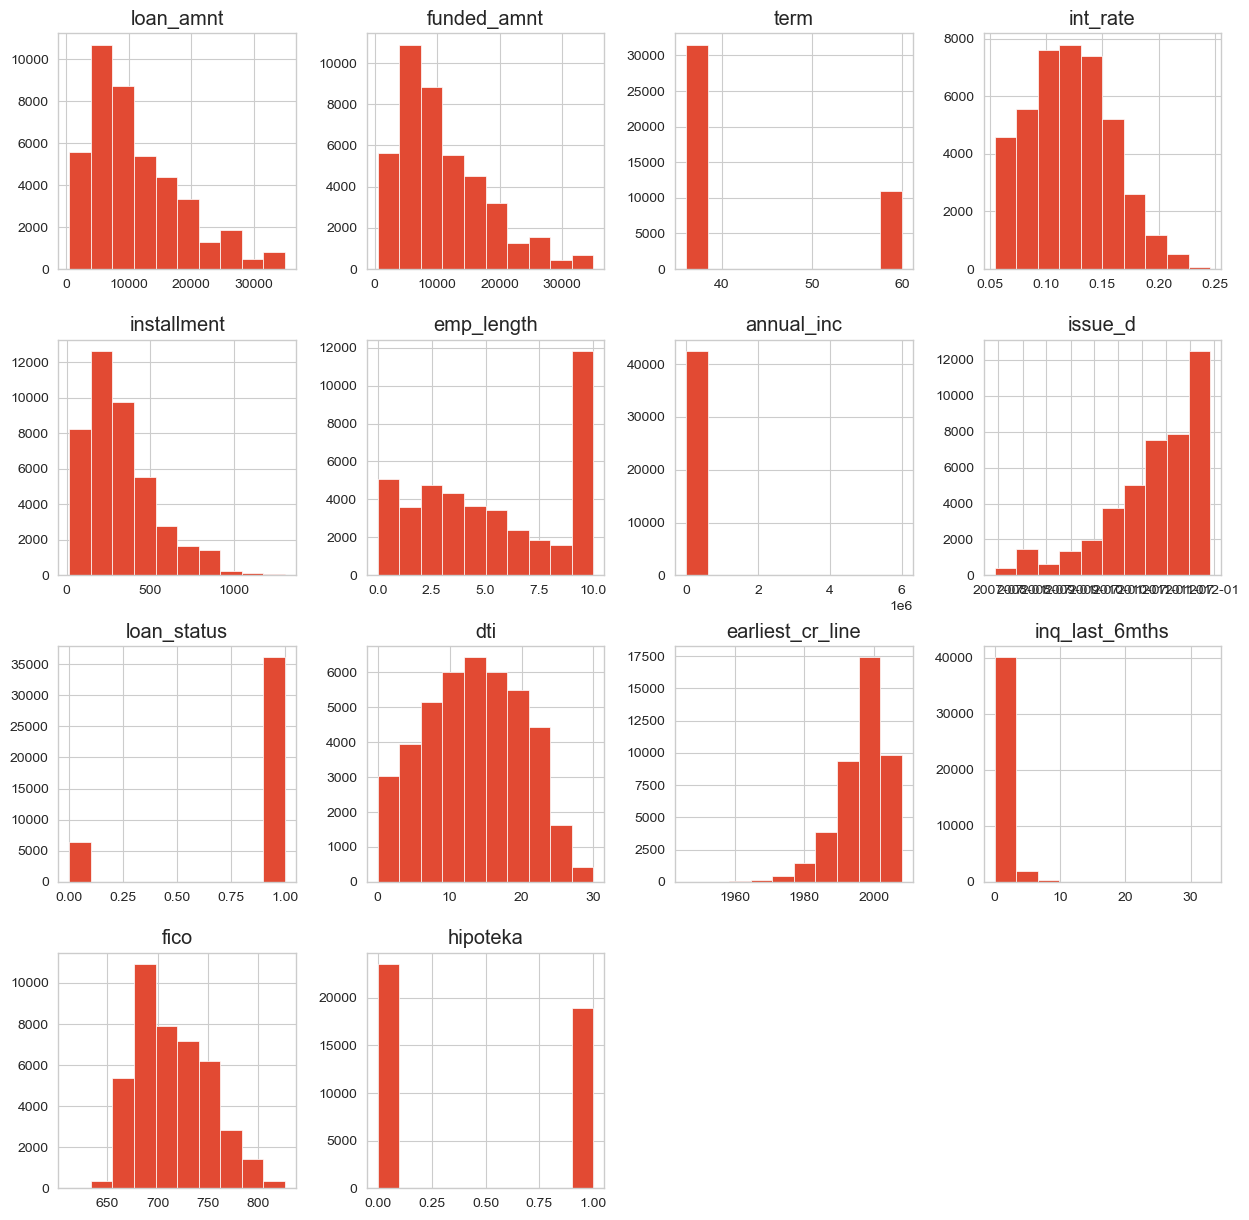

In [351]:
df.hist(figsize=(15,15))

In [352]:
#Sprawdzam korelację między poszczególnymi wartościami

In [353]:
cor=df.corr()
cor

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,earliest_cr_line,inq_last_6mths,fico,hipoteka
loan_amnt,1.000,0.982,0.356,0.292,0.931,0.140,0.276,-0.043,0.065,-0.191,-0.030,0.133,0.180
funded_amnt,0.982,1.000,0.335,0.295,0.957,0.139,0.272,-0.040,0.065,-0.185,-0.030,0.126,0.174
term,0.356,0.335,1.000,0.429,0.098,0.112,0.043,-0.134,0.077,-0.047,-0.012,0.000,0.107
int_rate,0.292,0.295,0.429,1.000,0.271,-0.012,0.054,-0.201,0.120,0.116,0.180,-0.703,-0.054
installment,0.931,0.957,0.098,0.271,1.000,0.110,0.278,-0.021,0.055,-0.169,-0.010,0.064,0.144
emp_length,0.140,0.139,0.112,-0.012,0.110,1.000,0.099,-0.019,0.054,-0.292,-0.022,0.098,0.236
annual_inc,0.276,0.272,0.043,0.054,0.278,0.099,1.000,0.038,-0.117,-0.189,0.028,0.052,0.204
loan_status,-0.043,-0.040,-0.134,-0.201,-0.021,-0.019,0.038,1.000,-0.042,-0.020,-0.111,0.142,0.022
dti,0.065,0.065,0.077,0.120,0.055,0.054,-0.117,-0.042,1.000,-0.055,0.015,-0.191,-0.007
earliest_cr_line,-0.191,-0.185,-0.047,0.116,-0.169,-0.292,-0.189,-0.020,-0.055,1.000,0.004,-0.235,-0.256


<AxesSubplot:>

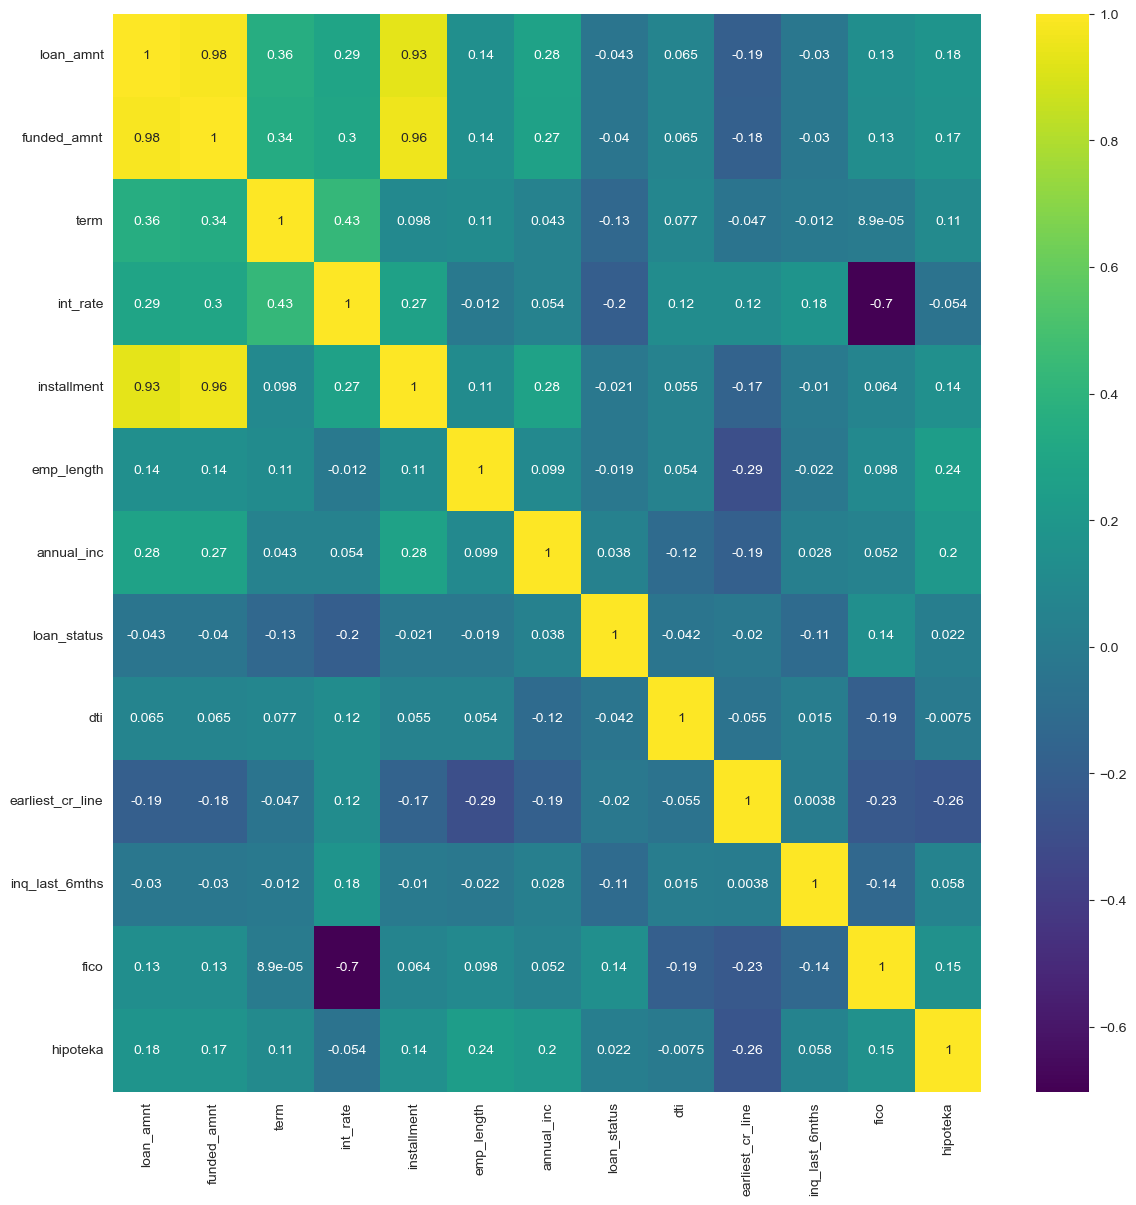

In [354]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [355]:
# Najlepiej dodatnio skorelowane z daną wyjściową są: 'fico range high' oraz 'fico range low' 
# Najbardziej odwrotnie skorelowane z daną wyjściową są 'int_rate', 'term' oraz 'inq_last_6mths'

# Wysoko skorelowane są zmienna 'installment' oraz 'loan_amnt' i ' funded_amnt' (0,93 i 0,96) - im wyższy kredyt, tym wyższa rata

# Bardzo wysoko skorelowane są też 'loan_amnt' (wnioskowana wysokość kredytu) i ' funded_amnt' (przyznana wysokość kredytu) - 
# narazie nie wiem, czy będę potrzebowała obydwu do modelu, ale nie będę żadnej usuwać, powieważ wykorzystam je do stworzenia
# nowej zmiennej

# Dość wysoko ze sobą skorelowane są 'total_acc' oraz 'open_acc'. Nie będę potrzebowała obywdu, ponieważ niosą podobną informację.
# 'total_acc' ma nieco lepszą korelację ze zmienną wyjściową, więc usunę zmienną 'open_acc'.

# Wysoko skorelowane są również zmienne 'pub_rec' i 'pub_rec_bankruptcies'. One również niosą podobną informację. 
# 'pub_rec' ma nieco lepszą korelację ze zmienną wyjściową, więc usuwam zmienną 'pub_rec_bankruptcies'

# Bardzo dobrą korelację (odwrotną) mają zmienne 'fico' oraz 'int_rate' - im niższy wskaźnik FICO, tym wyższe oprocentowanie kredytu

# Obie zmienne 'fico' też są ze sobą bardzo skorelowane - narazie nie będę żadnej usuwać, później stworzę z nich jedną zmienną 'fico'

In [356]:
df.drop(['open_acc'], axis=1, inplace=True)
df.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)

In [357]:
# Z powyższego wynika, że zmiennymi numerycznymi o największej wartości będą:
# 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment','fico_range_low', 'fico_range_high'

In [358]:
# Aby go potwierdzić wykonam później testy statystyczne

## Feature engeeniring

### Outliery

In [359]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
term                          float64
int_rate                      float64
installment                   float64
grade                          object
emp_length                      Int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                     int64
purpose                        object
dti                           float64
earliest_cr_line              float64
inq_last_6mths                float64
pub_rec                        object
total_acc                      object
fico                          float64
hipoteka                        int64
dtype: object

In [360]:
df['pub_rec'] = pd.to_numeric(df['pub_rec'],errors = 'coerce')
df['total_acc'] = pd.to_numeric(df['total_acc'],errors = 'coerce')
df['earliest_cr_line'] = pd.to_numeric(df['earliest_cr_line'],errors = 'coerce')

In [361]:
from scipy import stats

z = np.abs(stats.zscore(df[['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 
                            'annual_inc', 'dti', 'fico', 'pub_rec', 'total_acc']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

       loan_amnt  funded_amnt  int_rate  installment  annual_inc   dti  fico  \
0          0.822        0.815     0.409        0.765       0.704 2.123 0.606   
1          1.159        1.164     0.837        1.258       0.611 1.840 0.745   
2          1.173        1.178     1.024        1.141       0.888 0.692 0.606   
3          0.147        0.115     0.357        0.080       0.311 0.985 0.637   
4          1.092        1.094     0.142        1.220       0.170 0.679 0.499   
...          ...          ...       ...          ...         ...   ...   ...   
42531      1.024        1.024     0.508        1.001       1.730 0.501 0.775   
42532      1.361        1.374     0.681        1.391       0.891 0.501 0.499   
42533      1.156        1.161     0.765        1.158       0.638 0.501 0.084   
42534      0.619        0.605     1.021        0.564       0.158 1.394 0.745   
42535      0.822        0.815     1.191        0.797       0.013 0.678 1.574   

       pub_rec  total_acc  
0        0.

In [362]:
df.shape

(42536, 20)

In [363]:
df = df[(z<3).all(axis=1)]

In [364]:
df.shape

(38633, 20)

## Nowe zmienne:

In [365]:
#1 podzielę zmienną 'loan_amount' na zakresy wg wysokości pożyczki

In [366]:
def loan_amount(amnt):
    if amnt < 5000:
        return 'low'
    elif amnt >= 5000 and amnt < 15000:
        return 'medium'
    elif amnt >=15000 and amnt < 25000:
        return 'high'
    else:
        return 'very high'
    
    
df['loan_amnt_bining'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [367]:
df['loan_amnt_bining'].value_counts()

medium       20941
high          7960
low           7652
very high     2080
Name: loan_amnt_bining, dtype: int64

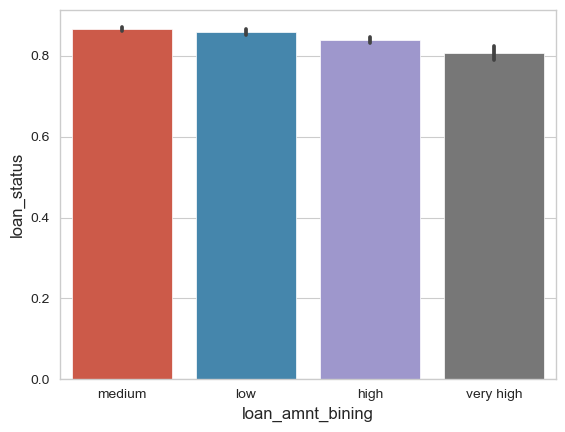

In [368]:
sns.barplot(x='loan_amnt_bining', y='loan_status', data=df)
plt.show()

In [369]:
# 2 stosunek kwoty wnioskowanej i kwoty otrzymanej

In [370]:
df['wnioskowal_dostal'] = df['loan_amnt']/df['funded_amnt']

In [371]:
df['wnioskowal_dostal']

0       1.000
1       1.000
2       1.000
3       1.000
4       1.000
         ... 
42531   1.000
42532   1.000
42533   1.000
42534   1.000
42535   1.000
Name: wnioskowal_dostal, Length: 38633, dtype: float64

In [372]:
# 3 różnica między kwotą wnioskowaną a otrzymaną

In [373]:
df['wnioskowal_dostal_roznica'] = df['loan_amnt'] - df['funded_amnt']

In [374]:
df['wnioskowal_dostal_roznica'].value_counts()

0.000        36909
5000.000        14
3625.000        10
1500.000        10
7500.000        10
             ...  
10275.000        1
10575.000        1
10800.000        1
11525.000        1
475.000          1
Name: wnioskowal_dostal_roznica, Length: 455, dtype: int64

In [375]:
# 4 stosunek kwoty wnioskowanej z rocznymi dochodami

In [376]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'],errors = 'coerce')

In [377]:
df['dochod_kredyt'] = df['loan_amnt']/df['annual_inc']
df['dochod_kredyt']

0       0.208
1       0.083
2       0.196
3       0.203
4       0.037
         ... 
42531   0.019
42532   0.083
42533   0.023
42534   0.110
42535   0.071
Name: dochod_kredyt, Length: 38633, dtype: float64

In [378]:
# 5 stosunek rocznych dochodów do spłacanej raty

In [379]:
df['dochod_rata'] = df['annual_inc']/df['installment']
df['dochod_rata']

0        147.357
1        501.421
2        145.286
3        145.000
4       1180.115
          ...   
42531   1587.442
42532    373.715
42533   1363.242
42534    288.030
42535    448.402
Name: dochod_rata, Length: 38633, dtype: float64

In [380]:
# 6 stosunek rocznego dochodu do wysokości oprocentowania

In [381]:
df['dochod_oprocentowanie'] = df['annual_inc']/df['int_rate']
df['dochod_oprocentowanie']

0        225352.113
1        196463.654
2         76766.917
3        364714.603
4        630417.652
            ...    
42531   1750972.763
42532    124481.328
42533   1178992.497
42534    704057.279
42535    903225.806
Name: dochod_oprocentowanie, Length: 38633, dtype: float64

In [382]:
# 7  dodanie kolumny z informacją, czy pożyczka jest konsolidacyjna, bądź nie (1 - tak, 0 - nie)

In [383]:
def konsolidacyjna(df):
    if (df['purpose'] == 'debt_consolidation'):
        return 1
    else:
        return 0

In [384]:
df['konsolidacyjna'] = df.apply(konsolidacyjna, axis=1)

In [385]:
df['konsolidacyjna'].value_counts()

0    20788
1    17845
Name: konsolidacyjna, dtype: int64

In [386]:
# 8 dodanie kolumny z informacją, jaka jest spłacalność przy dyżych kredytach

In [387]:
def duzy_kredyt(df):
    if (df['loan_amnt'] > 25000) and (df['loan_status'] == 1):
        return 1
    elif (df['loan_amnt'] > 25000 and (df['loan_status'] == 0)):
        return 0
    else:
          return 2

In [388]:
df['duzy_kredyt'] = df.apply(duzy_kredyt, axis=1)

In [389]:
df['duzy_kredyt']

0        2
1        2
2        2
3        2
4        2
        ..
42531    2
42532    2
42533    2
42534    2
42535    2
Name: duzy_kredyt, Length: 38633, dtype: int64

In [390]:
# 9 dodaję kolumnę z ilością miesięcy, jaką dana osoba posiada jakieś kredyty

In [391]:
df['earliest_cr_line'] = pd.to_numeric(df['earliest_cr_line'], errors='coerce').convert_dtypes()

In [392]:
df['earliest_cr_line'].value_counts(ascending = True)

1950       1
1959       1
1954       2
1961       2
1962       4
1965       6
1964       6
1966       9
1963      12
1967      14
1968      21
1969      35
1971      41
1970      44
1972      52
1974      58
1973      58
1975      82
1976      97
1977     106
1978     148
2008     159
1979     159
1980     171
1981     175
1982     207
1983     311
1984     363
1985     435
1986     471
1987     581
1988     691
2007     754
1989     813
1991     885
1990     979
1992     998
2006    1331
1993    1390
2005    1608
2004    1827
1994    1865
2003    1895
2002    1971
1995    1989
1996    2134
1997    2343
2001    2480
1998    2757
1999    2869
2000    3223
Name: earliest_cr_line, dtype: Int64

In [393]:
def historia_kredytu(df):
    if (df['earliest_cr_line'] >= 2000) and (df['loan_status'] == 1):
        return 1
    elif (df['earliest_cr_line'] >= 2000 and (df['loan_status'] == 0)):
        return 0
    else:
        return 2

In [394]:
df['historia_kredytu'] = df.apply(historia_kredytu, axis=1)

In [395]:
df['historia_kredytu'].value_counts()

2    23385
1    12927
0     2321
Name: historia_kredytu, dtype: int64

In [396]:
pd.crosstab(df['historia_kredytu'], df['loan_status'], normalize = 'index')

loan_status,0,1
historia_kredytu,,
0,1.000,0.000
1,0.000,1.000
2,0.140,0.860


In [397]:
# 10 dodam kolumnę z informacją, czy żródło dochodu zostało zweryfikowane (1), bądź nie (0)

In [398]:
df['verification_status'].value_counts()

Not Verified       17363
Verified           11788
Source Verified     9482
Name: verification_status, dtype: int64

In [399]:
def verification(df):
    if (df['verification_status'] == 'Source Verified'):
        return 1
    else:
        return 0

In [400]:
df['source_verified'] = df.apply(verification, axis=1)

In [401]:
df['source_verified']

0        0
1        1
2        0
3        1
4        1
        ..
42531    0
42532    0
42533    0
42534    0
42535    0
Name: source_verified, Length: 38633, dtype: int64

In [402]:
df['issue_d'].dtypes

dtype('<M8[ns]')

In [403]:
# 11 zmienną 'issue_d' wykorzystam do stworzenia kolumny z miesiącami, w których brane były pożyczki

In [404]:
#df['issue_month'] = pd.Series(df.issue_d).replace(r'-\d+', '')

In [405]:
df['issue_month'] = df['issue_d'].dt.month

In [406]:
df['issue_month'].value_counts()

12    4325
11    4043
10    3750
9     3481
8     3384
7     3374
6     3129
5     2883
4     2775
3     2719
1     2414
2     2356
Name: issue_month, dtype: int64

In [407]:
# Widać, że najwięcej kredytów wzięto w grudniu.
# Porównam, czy spłacalność kredytów rózniła się w poszczególnych miesiącach

In [408]:
 pd.pivot_table(df, index='loan_status', columns='issue_month', aggfunc="size")

issue_month,1,2,3,4,5,6,7,8,9,10,11,12
loan_status,,,,,,,,,,,,
0,353,304,371,381,436,467,473,448,526,570,598,669
1,2061,2052,2348,2394,2447,2662,2901,2936,2955,3180,3445,3656


In [409]:
pd.crosstab(df['issue_month'], df['loan_status'], normalize = 'index')

loan_status,0,1
issue_month,,
1,0.146,0.854
2,0.129,0.871
3,0.136,0.864
4,0.137,0.863
5,0.151,0.849
6,0.149,0.851
7,0.140,0.860
8,0.132,0.868
9,0.151,0.849


In [410]:
# Spłacalność w poszczególnych miesiącach jest podobna

In [411]:
df['issue_month'] = df['issue_d'].dt.month

In [412]:
df['issue_month'].value_counts

<bound method IndexOpsMixin.value_counts of 0        12
1        12
2        12
3        12
4        12
         ..
42531     6
42532     6
42533     6
42534     6
42535     6
Name: issue_month, Length: 38633, dtype: int64>

In [413]:
# Widać, że najwięcej kredytów wzięto w grudniu.
# Porównam, czy spłacalność kredytów rózniła się w poszczególnych miesiącach

In [414]:
pd.pivot_table(df, index='loan_status', columns='issue_month', aggfunc="size")

issue_month,1,2,3,4,5,6,7,8,9,10,11,12
loan_status,,,,,,,,,,,,
0,353,304,371,381,436,467,473,448,526,570,598,669
1,2061,2052,2348,2394,2447,2662,2901,2936,2955,3180,3445,3656


In [415]:
pd.crosstab(df['issue_month'], df['loan_status'], normalize = 'index')

loan_status,0,1
issue_month,,
1,0.146,0.854
2,0.129,0.871
3,0.136,0.864
4,0.137,0.863
5,0.151,0.849
6,0.149,0.851
7,0.140,0.860
8,0.132,0.868
9,0.151,0.849


In [416]:
# Spłacalność w poszczególnych miesiącach jest podobna

In [417]:
# 12 podzielę zmienną 'annual_inc' na zakresy wg dodchodu

In [418]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc_bining'] = df['annual_inc'].apply(lambda x: annual_income(x))

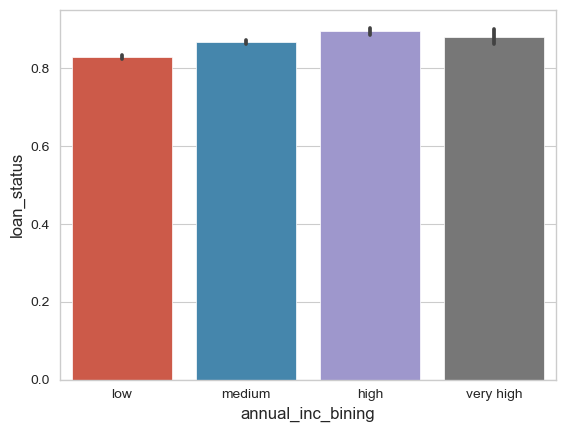

In [419]:
sns.barplot(x='annual_inc_bining', y='loan_status', data=df)
plt.show()

In [420]:
# 13 podzielę zmienną 'emp_length' na zakresy wg stażu pracy

In [421]:
df['emp_length'].value_counts()

10    9049
0     4761
2     4422
3     4035
1     3372
4     3370
5     3167
6     2160
7     1681
8     1411
9     1205
Name: emp_length, dtype: Int64

In [422]:
#df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce').convert_dtypes() 

In [423]:
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <= 3:
        return 'junior'
    elif n > 3 and n <= 7:
        return 'senior'
    else:
        return 'expert'

In [424]:
df['emp_length_bining'] = df['emp_length'].apply(lambda x: emp_length(x))

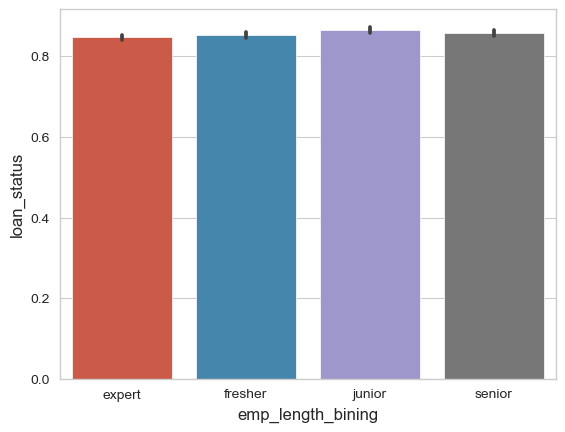

In [425]:
sns.barplot(x='emp_length_bining', y='loan_status', data=df)
plt.show()

In [426]:
# 14 podzielę zmienną 'inq_last_6mths' na zakresy wg ilości składanych wniosków kredytowych

In [427]:
df['inq_last_6mths'] = pd.to_numeric(df['inq_last_6mths'], errors='coerce').convert_dtypes() 

In [428]:
df['inq_last_6mths'].value_counts()

0     18166
1     10203
2      5348
3      2813
4       944
5       511
6       285
7       150
8       100
9        39
10       21
11       14
12       10
15        8
13        4
18        3
16        3
14        2
24        2
33        1
32        1
17        1
28        1
27        1
20        1
19        1
Name: inq_last_6mths, dtype: Int64

In [429]:
def inq_last_6mths(n):
    if n <= 5:
        return 'malo'
    elif n > 5 and n <= 10:
        return 'srednio'
    elif n > 10 and n <= 15:
        return 'duzo'
    else:
        return 'bardzo duzo'

In [430]:
df['inq_last_6mths_bining'] = df['inq_last_6mths'].apply(lambda x: inq_last_6mths(x))

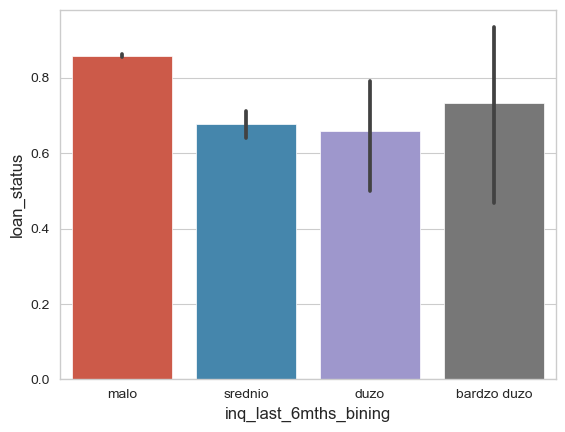

In [431]:
sns.barplot(x='inq_last_6mths_bining', y='loan_status', data=df)
plt.show()

In [432]:
# 15 różnica między rocznym dochodem a rocznymi ratami

In [433]:
df['installment'].value_counts()

311.110    67
180.960    59
311.020    52
150.800    48
368.450    46
           ..
335.740     1
553.430     1
141.440     1
491.480     1
204.840     1
Name: installment, Length: 15318, dtype: int64

In [434]:
df['dochod_raty_roznica'] = df['annual_inc'] - (df['installment'] * 12)

In [435]:
df['dochod_raty_roznica']

0        22045.560
1        29282.040
2        11240.040
3        45128.280
4        79186.520
           ...    
42531   178639.320
42532    11614.680
42533   109031.720
42534    56541.920
42535    68126.680
Name: dochod_raty_roznica, Length: 38633, dtype: float64

In [436]:
## 16 w odpowiedzi na pytanie do projektu stworzyłam kolumnę 'hipoteka' z informacją, 
## czy pożyczkobiorca posiada kredyt hipoteczny, bądź nie (1 - tak, 0 - nie)

In [437]:
# 17 podzielę zmienną 'fico' na zakresy

In [438]:
df['fico'] = pd.to_numeric(df['fico'], errors='coerce').convert_dtypes() 

In [439]:
def fico(n):
    if n <= 700:
        return 'malo'
    elif n > 700 and n <= 750:
        return 'srednio'
    elif n > 750 and n <= 800:
        return 'duzo'
    else:
        return 'bardzo duzo'

In [440]:
df['fico_bining'] = df['fico'].apply(lambda x: fico(x))

In [441]:
df['fico_bining'].value_counts()

srednio        16340
malo           14680
duzo            7021
bardzo duzo      592
Name: fico_bining, dtype: int64

In [442]:
# 18 dodam kolumnę z informacją, czy osoba mająca niski wskaźnik 'fico' spłaciła kredyt (1), bądź nie (0)

In [443]:
def niskie_fico(df):
    if (df['fico'] == 'malo') and (df['loan_status'] == 1):
        return 1
    else:
        return 0

In [444]:
df['niskie_fico'] = df.apply(niskie_fico, axis=1)

In [445]:
df['niskie_fico'].value_counts()

0    38633
Name: niskie_fico, dtype: int64

In [446]:
# 19 Podzielę 'int_rate' na przedziały

In [447]:
df['int_rate'].value_counts()

0.110    884
0.075    770
0.115    759
0.135    739
0.079    717
        ... 
0.229      1
0.218      1
0.173      1
0.168      1
0.174      1
Name: int_rate, Length: 385, dtype: int64

In [448]:
def int_rate(n):
    if n <= 0.1:
        return 'niskie'
    elif n > 0.1 and n <= 0.2:
        return 'srednie'
    else:
        return 'wysokie'

In [449]:
df['int_rate_bining'] = df['int_rate'].apply(lambda x: int_rate(x))

In [450]:
df['int_rate_bining'].value_counts()

srednie    25859
niskie     12093
wysokie      681
Name: int_rate_bining, dtype: int64

In [451]:
# 20 Dodam kolumnę z informacją, jak przestawia się spłata kredytu przy wysokim oprocentowaniu

In [452]:
def procent(df):
    if (df['int_rate_bining'] == 'wysokie') and (df['loan_status'] == 1):
        return 1
    elif (df['int_rate_bining'] == 'wysokie') and (df['loan_status'] == 0):
        return 0
    else:
        return 2

In [453]:
df['wysokie_oprocentowanie'] = df.apply(procent, axis=1)

In [454]:
df['wysokie_oprocentowanie'].value_counts()

2    37952
1      460
0      221
Name: wysokie_oprocentowanie, dtype: int64

### Zamiana zmiennych kategorycznych na numeryczne

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38633 entries, 0 to 42535
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   loan_amnt                  38633 non-null  float64       
 1   funded_amnt                38633 non-null  float64       
 2   term                       38633 non-null  float64       
 3   int_rate                   38633 non-null  float64       
 4   installment                38633 non-null  float64       
 5   grade                      38633 non-null  object        
 6   emp_length                 38633 non-null  Int64         
 7   home_ownership             38633 non-null  object        
 8   annual_inc                 38633 non-null  float64       
 9   verification_status        38633 non-null  object        
 10  issue_d                    38633 non-null  datetime64[ns]
 11  loan_status                38633 non-null  int64         
 12  purp

In [456]:
df['earliest_cr_line'] = pd.to_numeric(df['earliest_cr_line'])
df['earliest_cr_line'] = df['earliest_cr_line'].astype(float)

df['pub_rec'] = pd.to_numeric(df['pub_rec'])
df['pub_rec'] = df['pub_rec'].astype(float)

df['total_acc'] = pd.to_numeric(df['total_acc'])
df['total_acc'] = df['total_acc'].astype(float)

df['issue_d'] = pd.to_numeric(df['issue_d'])
df['issue_d'] = df['issue_d'].astype(float)

df['issue_month'] = pd.to_numeric(df['issue_month'])
df['issue_month'] = df['issue_month'].astype(float)

In [457]:
label_encoder = LabelEncoder()
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df['grade'] = label_encoder.fit_transform(df['grade'])
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])
df['loan_amnt_bining'] = label_encoder.fit_transform(df['loan_amnt_bining'])
df['annual_inc_bining'] = label_encoder.fit_transform(df['annual_inc_bining'])
df['emp_length_bining'] = label_encoder.fit_transform(df['emp_length_bining'])
df['inq_last_6mths_bining'] = label_encoder.fit_transform(df['inq_last_6mths_bining'])
df['fico_bining'] = label_encoder.fit_transform(df['fico_bining'])
df['int_rate_bining'] = label_encoder.fit_transform(df['int_rate_bining'])

### Testy statystyczne

In [458]:
# Żeby potwierdzić moje przypuszczenia i wybrać zmienne do modelowanie wykorzystam test chi2

In [459]:
df_chi = df.copy()

In [460]:
Y = df_chi['loan_status']
X = df_chi.drop(['loan_status'], axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [461]:
trans = StandardScaler()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [462]:
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
names = df_chi.columns
d = scaler.fit_transform(df_chi)
scaled_df = pd.DataFrame(df_chi, columns=names)
scaled_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,pub_rec,total_acc,fico,hipoteka,loan_amnt_bining,wnioskowal_dostal,wnioskowal_dostal_roznica,dochod_kredyt,dochod_rata,dochod_oprocentowanie,konsolidacyjna,duzy_kredyt,historia_kredytu,source_verified,issue_month,annual_inc_bining,emp_length_bining,inq_last_6mths_bining,dochod_raty_roznica,fico_bining,niskie_fico,int_rate_bining,wysokie_oprocentowanie
0,5000.000,5000.000,36.000,0.106,162.870,1,10,3,24000.000,2,1322697600000000000.000,1,1,27.650,1985.000,1,0.000,9.000,737,0,2,1.000,0.000,0.208,147.357,225352.113,0,2,2,0,12.000,1,0,2,22045.560,3,0,1,2
1,2500.000,2500.000,60.000,0.153,59.830,2,0,3,30000.000,1,1322697600000000000.000,0,0,1.000,1999.000,5,0.000,4.000,742,0,1,1.000,0.000,0.083,501.421,196463.654,0,2,2,1,12.000,1,1,2,29282.040,3,0,1,2
2,2400.000,2400.000,36.000,0.160,84.330,2,10,3,12252.000,0,1322697600000000000.000,1,11,8.720,2001.000,2,0.000,10.000,737,0,1,1.000,0.000,0.196,145.286,76766.917,0,2,1,0,12.000,1,0,2,11240.040,3,0,1,2
3,10000.000,10000.000,36.000,0.135,339.310,2,10,3,49200.000,1,1322697600000000000.000,1,9,20.000,1996.000,1,0.000,37.000,692,0,2,1.000,0.000,0.203,145.000,364714.603,0,2,2,1,12.000,1,0,2,45128.280,2,0,1,2
4,3000.000,3000.000,60.000,0.127,67.790,1,1,3,80000.000,1,1322697600000000000.000,1,9,17.940,1996.000,0,0.000,38.000,697,0,1,1.000,0.000,0.037,1180.115,630417.652,0,2,2,1,12.000,2,1,2,79186.520,2,0,1,2


In [463]:
X_test.flatten()

array([-0.09253538, -0.05940547, -0.57440404, ...,  0.        ,
        0.59840133,  0.1267446 ])

In [464]:
X_train.flatten()

array([-0.87038105, -0.86320723, -0.57440404, ...,  0.        ,
        0.59840133,  0.1267446 ])

In [465]:
Y = df_chi['loan_status']
X = df_chi.drop(['loan_status'], axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [466]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X_train,Y_train)

In [467]:
chi_scores

(array([1.51468742e+05, 1.18892396e+05, 1.16157178e+03, 1.10779240e+01,
        6.18168417e+02, 1.19774545e+03, 1.16380657e+01, 2.35746935e+01,
        2.12141832e+06, 2.06577064e+01, 3.25373178e+15, 2.11788236e+02,
        1.52783354e+02, 4.24741642e-01, 6.15344749e+02,            nan,
        1.77315680e+02, 8.89511611e+02, 1.01883811e+01, 1.71565331e+00,
        1.23464020e-01, 1.05322220e+05, 1.81290062e+01, 1.47823000e+04,
        1.45251120e+08, 5.09713187e-01, 2.05656029e+00, 4.15122843e+02,
        2.16795797e-02, 1.15915469e+01, 1.73497703e+00, 2.66273079e+00,
        6.57655900e-01, 2.31461794e+06, 1.42256468e+01,            nan,
        2.26289318e+02, 7.93725596e+00]),
 array([0.00000000e+000, 0.00000000e+000, 1.37068143e-254, 8.73615526e-004,
        1.87120266e-136, 1.88485083e-262, 6.46157582e-004, 1.20157439e-006,
        0.00000000e+000, 5.49157058e-006, 0.00000000e+000, 5.59411029e-048,
        4.27189715e-035, 5.14580490e-001, 7.69597057e-136,             nan,
      

In [468]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [469]:
p_values.sort_values(ascending = False)

source_verified             0.883
wnioskowal_dostal           0.725
earliest_cr_line            0.515
konsolidacyjna              0.475
inq_last_6mths_bining       0.417
loan_amnt_bining            0.190
annual_inc_bining           0.188
duzy_kredyt                 0.152
emp_length_bining           0.103
wysokie_oprocentowanie      0.005
hipoteka                    0.001
int_rate                    0.001
issue_month                 0.001
emp_length                  0.001
fico_bining                 0.000
dochod_kredyt               0.000
verification_status         0.000
home_ownership              0.000
dti                         0.000
total_acc                   0.000
purpose                     0.000
int_rate_bining             0.000
historia_kredytu            0.000
inq_last_6mths              0.000
installment                 0.000
fico                        0.000
term                        0.000
grade                       0.000
issue_d                     0.000
dochod_raty_ro

<AxesSubplot:>

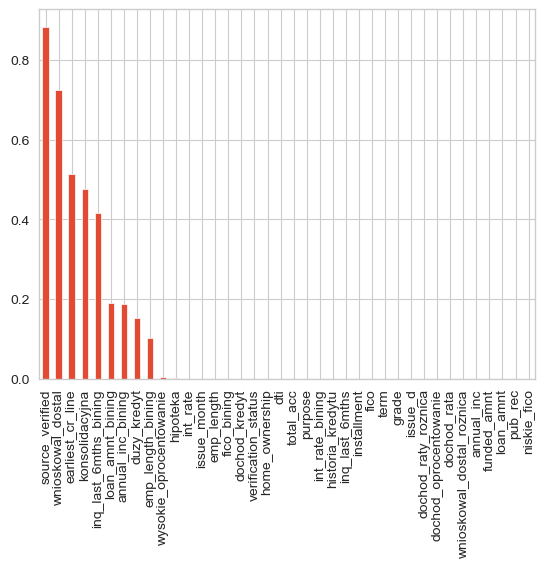

In [470]:
p_values.plot.bar()

In [471]:
# wnioskowal_dostal, earliest_cr_line, loan_amnt_bining, annual_inc_bining, inq_last_6mnths_bining, 
# source_verified, hipoteka, konsolidacyjna, duzy_kredyt, emp_length_bining, wysokie_oprocentowanie 
# mają najwyższe wartości p-value - powyżej 0.05
# Są niezależne, więc nie mogą być wykorzystaniu do trenowania modeli

In [472]:
df.drop(
['wnioskowal_dostal', 'earliest_cr_line', 'loan_amnt_bining', 'annual_inc_bining', 
 'inq_last_6mths_bining', 'source_verified', 'hipoteka', 'konsolidacyjna', 'duzy_kredyt', 'emp_length_bining', 
 'wysokie_oprocentowanie'],
axis=1, inplace=True)

## Klasteryzacja -   KMeans, Hierarchiczna i DBScan

In [473]:
df_klast = df.copy()

In [474]:
Y = df_klast['loan_status']
X = df_klast.drop(['loan_status'], axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [475]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_train)

In [476]:
print(X.shape)
print(X_pca_final.shape)

(38633, 27)
(27043, 4)


In [477]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [478]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_train)

KMeans(max_iter=1000, n_clusters=5)

In [479]:
kmeans.labels_

array([4, 3, 0, ..., 4, 4, 2])

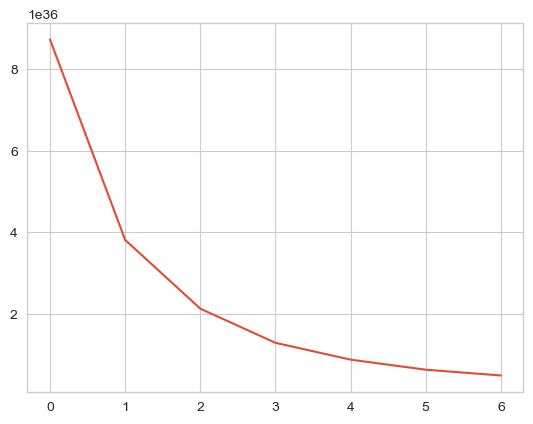

In [480]:
# metoda łokcia - elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_train)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [481]:
# Na postawie powyższego optymalną liczbą klastrów będzie 3 

# Aby to sprawdzić wykonam jeszcze test Silhouette

In [482]:
# Miara wewnętrzna - wskaźnik sylwetkowy

range_n_clusters = [3, 4, 5, 6]

for num_clusters in range_n_clusters:
     
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_train)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=3, the silhouette score is 0.6012386014137555
For n_clusters=4, the silhouette score is 0.58913491219338
For n_clusters=5, the silhouette score is 0.5792508523202566
For n_clusters=6, the silhouette score is 0.5762350502808733


In [483]:
# Decyduję się na 3 klastry

In [484]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)
kmeans.fit(X_train)

KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [485]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 2])

In [486]:
df_klast['K-Means_Cluster_ID'] = pd.Series(kmeans.labels_)

In [487]:
df_klast.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,pub_rec,total_acc,fico,wnioskowal_dostal_roznica,dochod_kredyt,dochod_rata,dochod_oprocentowanie,historia_kredytu,issue_month,dochod_raty_roznica,fico_bining,niskie_fico,int_rate_bining,K-Means_Cluster_ID
0,5000.000,5000.000,36.000,0.106,162.870,1,10,3,24000.000,2,1322697600000000000.000,1,1,27.650,1,0.000,9.000,737,0.000,0.208,147.357,225352.113,2,12.000,22045.560,3,0,1,0.000
1,2500.000,2500.000,60.000,0.153,59.830,2,0,3,30000.000,1,1322697600000000000.000,0,0,1.000,5,0.000,4.000,742,0.000,0.083,501.421,196463.654,2,12.000,29282.040,3,0,1,1.000
2,2400.000,2400.000,36.000,0.160,84.330,2,10,3,12252.000,0,1322697600000000000.000,1,11,8.720,2,0.000,10.000,737,0.000,0.196,145.286,76766.917,1,12.000,11240.040,3,0,1,0.000
3,10000.000,10000.000,36.000,0.135,339.310,2,10,3,49200.000,1,1322697600000000000.000,1,9,20.000,1,0.000,37.000,692,0.000,0.203,145.000,364714.603,2,12.000,45128.280,2,0,1,2.000
4,3000.000,3000.000,60.000,0.127,67.790,1,1,3,80000.000,1,1322697600000000000.000,1,9,17.940,0,0.000,38.000,697,0.000,0.037,1180.115,630417.652,2,12.000,79186.520,2,0,1,1.000


In [488]:
df_klast['K-Means_Cluster_ID'].value_counts()

0.000    12209
1.000     9014
2.000     3185
Name: K-Means_Cluster_ID, dtype: int64

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

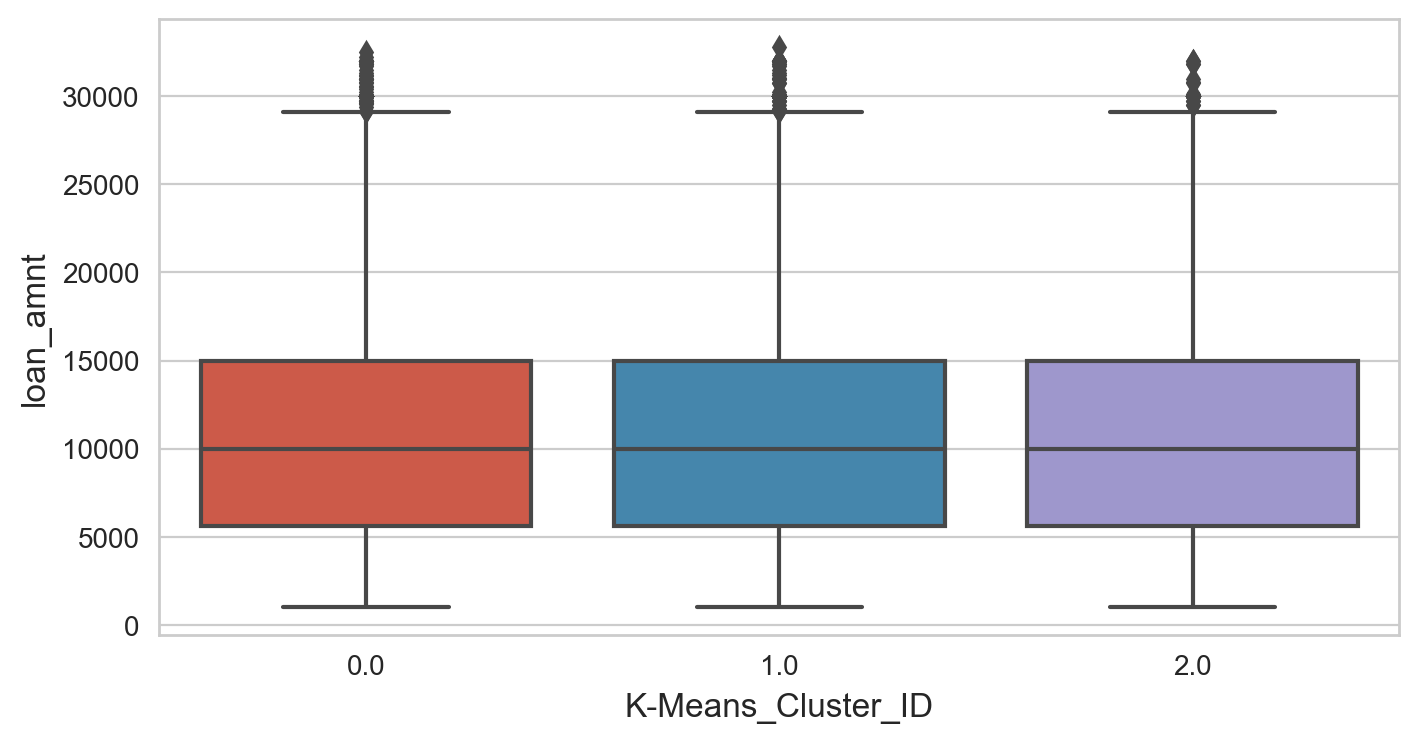

In [489]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=df_klast)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='int_rate'>

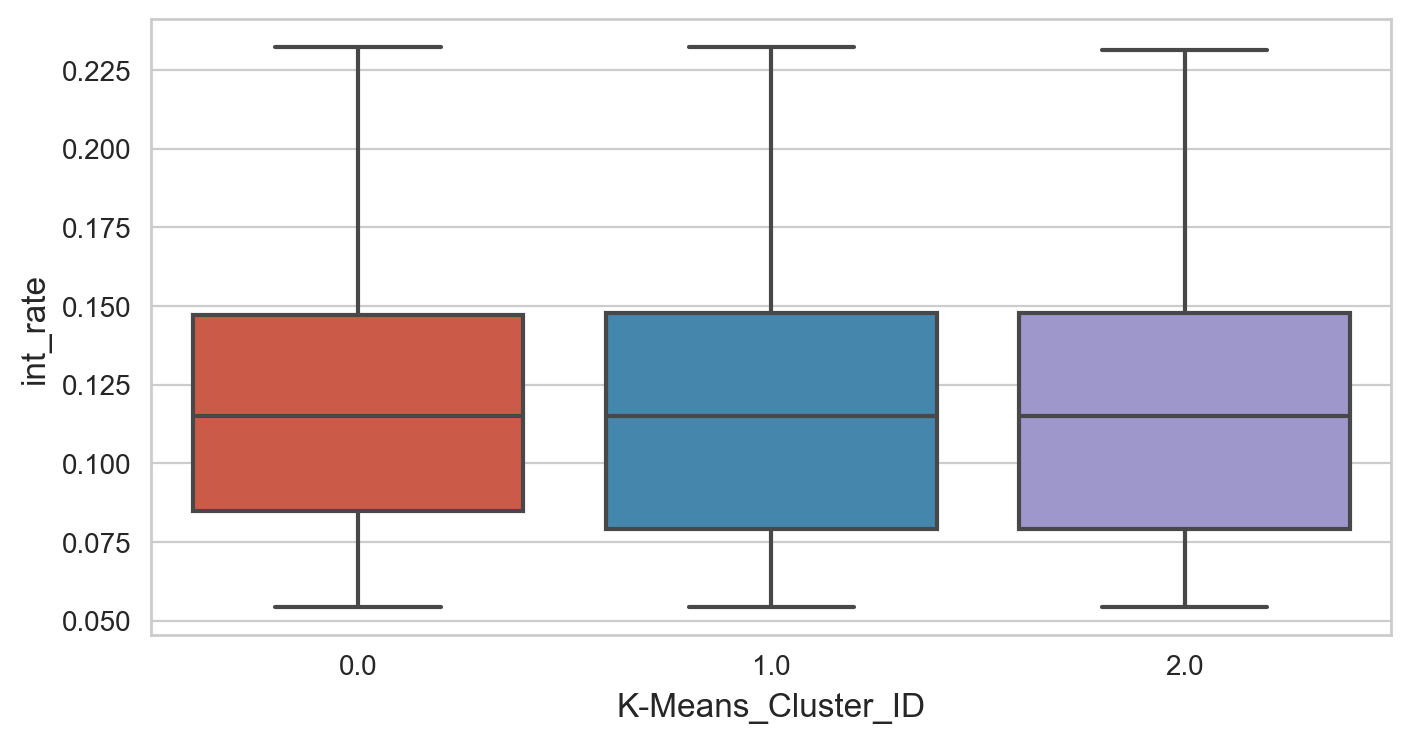

In [490]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='int_rate', data=df_klast)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='fico'>

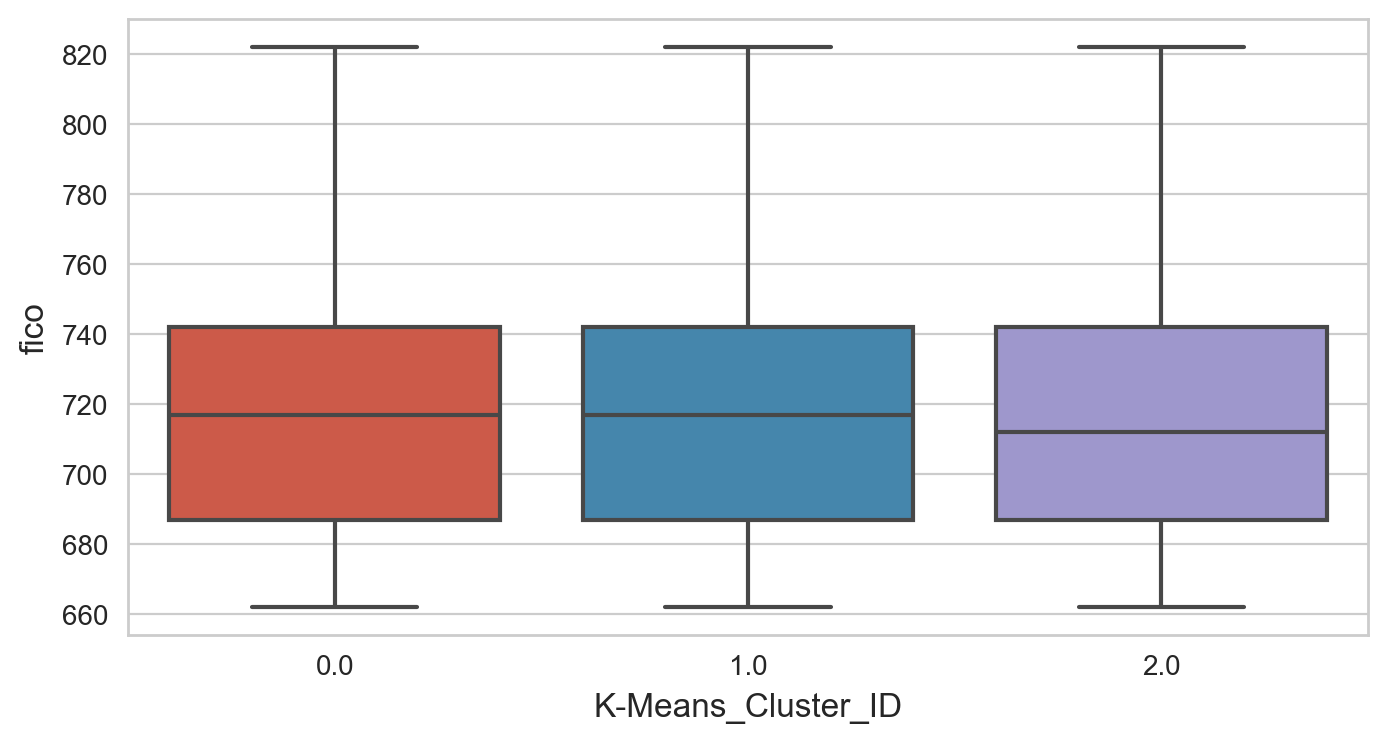

In [491]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='fico', data=df_klast)

In [492]:
# Wszystkie klastry są do siebie bardzo podobne, więc nie będę ich wykorzystywać w modelowaniu

## Train-test Split 

In [493]:
Y = df['loan_status']
X = df.drop(['loan_status'], axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

## Standaryzacja

In [494]:
#Dzięki standaryzacji zmienne mogą być między sobą porównywane. 
#Standaryzowana zmienna ma średnią na równą 0 i odchylenie standardowe na równe 1

In [495]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
trans = StandardScaler()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

## SMOTE 

In [ ]:
#Zmienna objaśniana (target) jest niezbalansowana - 85% stanowią spłacone kredyty. 
#Żeby zbalansować dane użyję metody SMOTE (zduplikuje obserwacje z klasy mniejszościowej w zbiorze treningowym)

In [496]:
np.bincount(Y_train)

array([ 3874, 23169], dtype=int64)

In [497]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [498]:
np.bincount(Y_train)

array([23169, 23169], dtype=int64)

# Modelowanie

In [500]:
''' 
Do modelowania wykorzystałam następujące klasyfikatory z biblioteki scikit-learn:
- Logistic Regression – Klasyfikacja za pomocą regresji logistycznej
- Random Forest Classifier – Lasy losowe
- XGBoost
- ADABoost
- BaggingClassifier

Do ewaluacji klasyfikatorów wykorzystałam ten sam zbiór uczący, podzielony na zbiór treningowy i zbiór testowy.

Jako miernik wydajności klasyfikatorów użyłam parametru AUROC score. Mówi on, jak bardzo model jest w stanie rozróżnić klasy. 
Im wyższy AUC, tym lepiej model przewiduje klasę 0 jako 0 i klasę 1 jako 1

Ważne cechy podczas wyboru modelu do rozpatrywanego problemu klasyfikacyjnego:
- przedstawiane rezultaty są łatwo interpretowalne - aby w prosty sposób zobrazować i wytłumaczyć proces stojący za decyzją banku,
pomóc w zrozumieniu czynników wpływających na prognozę.
- liczba obserwacji - dobrze radzi sobie przy dużej liczbie obserwacji
- dokładność i czas uczenia - im dokładniejszy tym lepiej. Lepszą dokładność uzyskuje się kosztem nieco dłuższego czasu uczenia
- overfitting -  tendencja do nadmiernego dopasowywania algorytmu; trzeba mieć to na uwadze, aby móc temu zapobiec 
np. poprzez wcześniejsze 'przycięcie' drzewa decyzyjnego na ustalonej głębokości


'''

" \nDo modelowania wykorzystałam następujące klasyfikatory z biblioteki scikit-learn:\n- Logistic Regression – Klasyfikacja za pomocą regresji logistycznej\n- Random Forest Classifier – Lasy losowe\n- XGBoost\n- ADABoost\n- BaggingClassifier\n\nDo ewaluacji klasyfikatorów wykorzystałam ten sam zbiór uczący, podzielony na zbiór treningowy i zbiór testowy.\n\nJako miernik wydajności klasyfikatorów użyłam parametru AUROC score. Mówi on, jak bardzo model jest w stanie rozróżnić klasy. \nIm wyższy AUC, tym lepiej model przewiduje klasę 0 jako 0 i klasę 1 jako 1\n\nWażne cechy podczas wyboru modelu do rozpatrywanego problemu klasyfikacyjnego:\n- przedstawiane rezultaty są łatwo interpretowalne - aby w prosty sposób zobrazować i wytłumaczyć proces stojący za decyzją banku,\npomóc w zrozumieniu czynników wpływających na prognozę.\n- liczba obserwacji - dobrze radzi sobie przy dużej liczbie obserwacji\n- dokładność i czas uczenia - im dokładniejszy tym lepiej. Lepszą dokładność uzyskuje się kos

### Regresja logistyczna

In [501]:
logit=LogisticRegression()
logit.fit(X_train,Y_train)

Y_pred=logit.predict(X_test)
Y_pred1=logit.predict_proba(X_test)

In [502]:
print('Regresja logistyczna - dane treningowe:',logit.score(X_train,Y_train))
print('Regrasja logistyczna - dane testowe:',logit.score(X_test,Y_test))

acc_logit = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_logit)
roc_logit = roc_auc_score(Y_test, logit.predict_proba(X_test)[:,1])
print('AUROC: ', roc_logit)

Regresja logistyczna - dane treningowe: 0.6552073891838233
Regrasja logistyczna - dane testowe: 0.6647972389991372
Accuracy:  0.6647972389991372
AUROC:  0.7359666176573746


In [503]:
results_logit = pd.DataFrame({'Method':['Regresja logistyczna'], 'Accuracy': acc_logit, 'AUROC': roc_logit}, index = {'1'})
results = pd.concat([results_logit])
results = results[['Method', 'Accuracy', 'AUROC']]
results

,Method,Accuracy,AUROC
1,Regresja logistyczna,0.665,0.736


### Random Forest

In [504]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)

Y_pred=random_forest.predict(X_test)
Y_pred1=random_forest.predict_proba(X_test)

In [505]:
print('RandomForest - dane treningowe:',random_forest.score(X_train,Y_train))
print('RandomForest - dane testowe:',random_forest.score(X_test,Y_test))

acc_random_forest = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_random_forest)
roc_random_forest = roc_auc_score(Y_test, random_forest.predict_proba(X_test)[:,1])
print('AUROC: ', roc_random_forest)

RandomForest - dane treningowe: 1.0
RandomForest - dane testowe: 0.9044003451251078
Accuracy:  0.9044003451251078
AUROC:  0.8819764385827887


In [506]:
results_RF = pd.DataFrame({'Method':['RandomForest'], 'Accuracy': acc_random_forest, 'AUROC': roc_random_forest}, index = {'2'})
results = pd.concat([results, results_RF])
results = results[['Method', 'Accuracy', 'AUROC']]
results

,Method,Accuracy,AUROC
1,Regresja logistyczna,0.665,0.736
2,RandomForest,0.904,0.882


### XGBoost

In [507]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train,Y_train)

Y_pred=model_XGB.predict(X_test)
Y_pred1=model_XGB.predict_proba(X_test)

In [508]:
print('XGB - dane treningowe:',model_XGB.score(X_train,Y_train))
print('XGB - dane testowe:',model_XGB.score(X_test,Y_test))

acc_model_XGB = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_XGB)
roc_model_XGB = roc_auc_score(Y_test, model_XGB.predict_proba(X_test)[:,1])
print('AUROC: ', roc_model_XGB)

XGB - dane treningowe: 0.9678449652552981
XGB - dane testowe: 0.9077653149266609
Accuracy:  0.9077653149266609
AUROC:  0.8825458891278934


In [509]:
results_XGB = pd.DataFrame({'Method':['XGBoost'], 'Accuracy': acc_model_XGB, 'AUROC': roc_model_XGB}, index = {'3'})
results = pd.concat([results, results_XGB])
results = results[['Method', 'Accuracy', 'AUROC']]
results

,Method,Accuracy,AUROC
1,Regresja logistyczna,0.665,0.736
2,RandomForest,0.904,0.882
3,XGBoost,0.908,0.883


### AdaBoost

In [510]:
model_ADA=AdaBoostClassifier()
model_ADA.fit(X_train,Y_train)

Y_pred=model_ADA.predict(X_test)
Y_pred1=model_ADA.predict_proba(X_test)

In [511]:
print('ADA - dane treningowe:',model_ADA.score(X_train,Y_train))
print('ADA - dane testowe:',model_ADA.score(X_test,Y_test))

acc_model_ADA = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_ADA)
roc_model_ADA = roc_auc_score(Y_test, model_ADA.predict_proba(X_test)[:,1])
print('AUROC: ', roc_model_ADA)

ADA - dane treningowe: 0.8940826103845656
ADA - dane testowe: 0.8617773943054358
Accuracy:  0.8617773943054358
AUROC:  0.8882193267036613


In [512]:
results_ADA = pd.DataFrame({'Method':['ADA'], 'Accuracy': acc_model_ADA, 'AUROC': roc_model_ADA},index={'4'})
results = pd.concat([results, results_ADA])
results = results[['Method', 'Accuracy', 'AUROC']]
results

,Method,Accuracy,AUROC
1,Regresja logistyczna,0.665,0.736
2,RandomForest,0.904,0.882
3,XGBoost,0.908,0.883
4,ADA,0.862,0.888


### BaggingClassifier

In [513]:
model_bagging=BaggingClassifier()
model_bagging.fit(X_train,Y_train)

Y_pred=model_bagging.predict(X_test)
Y_pred1=model_bagging.predict_proba(X_test)

In [514]:
print('BaggingClassifier - dane treningowe:',model_bagging.score(X_train,Y_train))
print('BaggingClassifier - dane testowe:',model_bagging.score(X_test,Y_test))

acc_model_bagging = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_bagging)
roc_model_bagging = roc_auc_score(Y_test, model_bagging.predict_proba(X_test)[:,1])
print('AUROC: ', roc_model_bagging)

BaggingClassifier - dane treningowe: 0.9982303940610299
BaggingClassifier - dane testowe: 0.8781708369283865
Accuracy:  0.8781708369283865
AUROC:  0.8451318731294906


In [515]:
results_bagging = pd.DataFrame({'Method':['Bagging'], 'Accuracy': acc_model_bagging, 'AUROC': roc_model_bagging},index={'5'})
results = pd.concat([results, results_bagging])
results = results[['Method', 'Accuracy', 'AUROC']]
results

,Method,Accuracy,AUROC
1,Regresja logistyczna,0.665,0.736
2,RandomForest,0.904,0.882
3,XGBoost,0.908,0.883
4,ADA,0.862,0.888
5,Bagging,0.878,0.845


## PCA 

In [516]:
## Zredukuję wymiarowość zbioru danych do 3 cech

In [517]:
from sklearn.decomposition import PCA

pca = PCA(10)
pca.fit(X_train)

PCA(n_components=10)

In [518]:
pca.n_components_

10

In [519]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Modelowanie na skompresowanych danych

In [520]:
Y = df['loan_status']
X = df.drop(['loan_status'], axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

### Regresja logistyczna

In [521]:
logit=LogisticRegression()
logit.fit(X_train, Y_train)

Y_pred=logit.predict(X_test)
Y_pred1=logit.predict_proba(X_test)

C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [522]:
print('DecTree - dane treningowe:',logit.score(X_train,Y_train))
print('DecTree - dane testowe:',logit.score(X_test,Y_test))

logit = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',logit)
roc_logit = roc_auc_score(Y_test, Y_pred1[:,1])
print('AUROC: ', roc_logit)

DecTree - dane treningowe: 0.1432533372776689
DecTree - dane testowe: 0.14857635893011217
Accuracy:  0.14857635893011217
AUROC:  0.5


In [523]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.15      1.00      0.26      1722
           1       0.00      0.00      0.00      9868

    accuracy                           0.15     11590
   macro avg       0.07      0.50      0.13     11590
weighted avg       0.02      0.15      0.04     11590



C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [524]:
results_logit = pd.DataFrame({'Method':['RegLogit PCA'], 'Accuracy': logit, 'AUROC': roc_logit},index={'1'})
results_pca = pd.concat([results_logit])
results_pca = results_pca[['Method', 'Accuracy', 'AUROC']]
results_pca

,Method,Accuracy,AUROC
1,RegLogit PCA,0.149,0.500


### Random Forest

In [525]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)

Y_pred=random_forest_model.predict(X_test)
Y_pred1=random_forest_model.predict_proba(X_test)

In [526]:
print('DecTree - dane treningowe:',random_forest_model.score(X_train,Y_train))
print('DecTree - dane testowe:',random_forest_model.score(X_test,Y_test))

random_forest_model = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',random_forest_model)
roc_random_forest_model = roc_auc_score(Y_test, Y_pred1[:,1])
print('AUROC: ', roc_random_forest_model)

DecTree - dane treningowe: 1.0
DecTree - dane testowe: 0.9120793787748058
Accuracy:  0.9120793787748058
AUROC:  0.8793266236269983


In [527]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.42      0.58      1722
           1       0.91      1.00      0.95      9868

    accuracy                           0.91     11590
   macro avg       0.94      0.71      0.77     11590
weighted avg       0.92      0.91      0.90     11590



In [528]:
results_random_forest_model = pd.DataFrame({'Method':['RandomForest PCA'], 'Accuracy': random_forest_model, 'AUROC': roc_random_forest_model},index={'2'})
results_pca = pd.concat([results_pca, results_random_forest_model])
results_pca = results_pca[['Method', 'Accuracy', 'AUROC']]
results_pca

,Method,Accuracy,AUROC
1,RegLogit PCA,0.149,0.500
2,RandomForest PCA,0.912,0.879


### XGBoost

In [529]:
model_XGB=XGBClassifier()
model_XGB.fit(X_train, Y_train)

Y_pred=model_XGB.predict(X_test)
Y_pred1=model_XGB.predict_proba(X_test)

In [530]:
print('XGBoost - dane treningowe:',model_XGB.score(X_train,Y_train))
print('XGBoost - dane testowe:',model_XGB.score(X_test,Y_test))

model_XGB = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',model_XGB)
roc_model_XGB = roc_auc_score(Y_test, Y_pred1[:,1])
print('AUROC: ', roc_model_XGB)

XGBoost - dane treningowe: 0.9527419295196539
XGBoost - dane testowe: 0.9083692838654012
Accuracy:  0.9083692838654012
AUROC:  0.8814154328424401


In [531]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59      1722
           1       0.91      0.99      0.95      9868

    accuracy                           0.91     11590
   macro avg       0.90      0.72      0.77     11590
weighted avg       0.91      0.91      0.90     11590



In [532]:
results_model_XGB = pd.DataFrame({'Method':['XGBoost PCA'], 'Accuracy': model_XGB, 'AUROC': roc_model_XGB},index={'3'})
results_pca = pd.concat([results_pca, results_model_XGB])
results_pca = results_pca[['Method', 'Accuracy', 'AUROC']]
results_pca

,Method,Accuracy,AUROC
1,RegLogit PCA,0.149,0.500
2,RandomForest PCA,0.912,0.879
3,XGBoost PCA,0.908,0.881


### AdaBoost

In [533]:
model_ADA=AdaBoostClassifier()
model_ADA.fit(X_train, Y_train)

Y_pred=model_ADA.predict(X_test)
Y_pred1=model_ADA.predict_proba(X_test)

In [534]:
print('ADABoost - dane treningowe:',model_ADA.score(X_train,Y_train))
print('ADABoost - dane testowe:',model_ADA.score(X_test,Y_test))

model_ADA = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',model_ADA)
roc_model_ADA = roc_auc_score(Y_test, Y_pred1[:,1])
print('AUROC: ', roc_model_ADA)

ADABoost - dane treningowe: 0.9169101061272787
ADABoost - dane testowe: 0.9117342536669543
Accuracy:  0.9117342536669543
AUROC:  0.8925081105434948


In [535]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.42      0.59      1722
           1       0.91      1.00      0.95      9868

    accuracy                           0.91     11590
   macro avg       0.94      0.71      0.77     11590
weighted avg       0.92      0.91      0.90     11590



In [536]:
results_model_ADA = pd.DataFrame({'Method':['ADABoost PCA'], 'Accuracy': model_ADA, 'AUROC': roc_model_ADA},index={'4'})
results_pca = pd.concat([results_pca, results_model_ADA])
results_pca = results_pca[['Method', 'Accuracy', 'AUROC']]
results_pca

,Method,Accuracy,AUROC
1,RegLogit PCA,0.149,0.500
2,RandomForest PCA,0.912,0.879
3,XGBoost PCA,0.908,0.881
4,ADABoost PCA,0.912,0.893


### BaggingClassifier

In [537]:
model_bagging=BaggingClassifier()
model_bagging.fit(X_train, Y_train)

Y_pred=model_bagging.predict(X_test)
Y_pred1=model_bagging.predict_proba(X_test)

In [538]:
print('Bagging - dane treningowe:',model_bagging.score(X_train,Y_train))
print('Bagging - dane testowe:',model_bagging.score(X_test,Y_test))

model_bagging = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',model_bagging)
roc_model_bagging = roc_auc_score(Y_test, Y_pred1[:,1])
print('AUROC: ', roc_model_bagging)

Bagging - dane treningowe: 0.996080316532929
Bagging - dane testowe: 0.8965487489214841
Accuracy:  0.8965487489214841
AUROC:  0.8480209673615065


In [539]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58      1722
           1       0.91      0.97      0.94      9868

    accuracy                           0.90     11590
   macro avg       0.82      0.72      0.76     11590
weighted avg       0.89      0.90      0.89     11590



In [540]:
results_model_bagging = pd.DataFrame({'Method':['Bagging PCA'], 'Accuracy': model_bagging, 'AUROC': roc_model_bagging},index={'5'})
results_pca = pd.concat([results_pca, results_model_bagging])
results_pca = results_pca[['Method', 'Accuracy', 'AUROC']]
results_pca

,Method,Accuracy,AUROC
1,RegLogit PCA,0.149,0.500
2,RandomForest PCA,0.912,0.879
3,XGBoost PCA,0.908,0.881
4,ADABoost PCA,0.912,0.893
5,Bagging PCA,0.897,0.848


In [541]:
# Wyniki modelowania przed PCA
results

,Method,Accuracy,AUROC
1,Regresja logistyczna,0.665,0.736
2,RandomForest,0.904,0.882
3,XGBoost,0.908,0.883
4,ADA,0.862,0.888
5,Bagging,0.878,0.845


In [542]:
# PCA nie wpłynęła znacząco na poprawę accuracy ani AUROC. Wyniki są bardzo podobne

### ADABoost

In [543]:
# Najlepszy wynik (rzędu 0,893) osiągnął klasyfikator ADABoost i wybieram go jako ostateczny model 

# Najpierw poszukam najbardziej skorelowanych zmiennych i usunę te najbardziej ze sobą skorelowane

### Pearson Correlation 

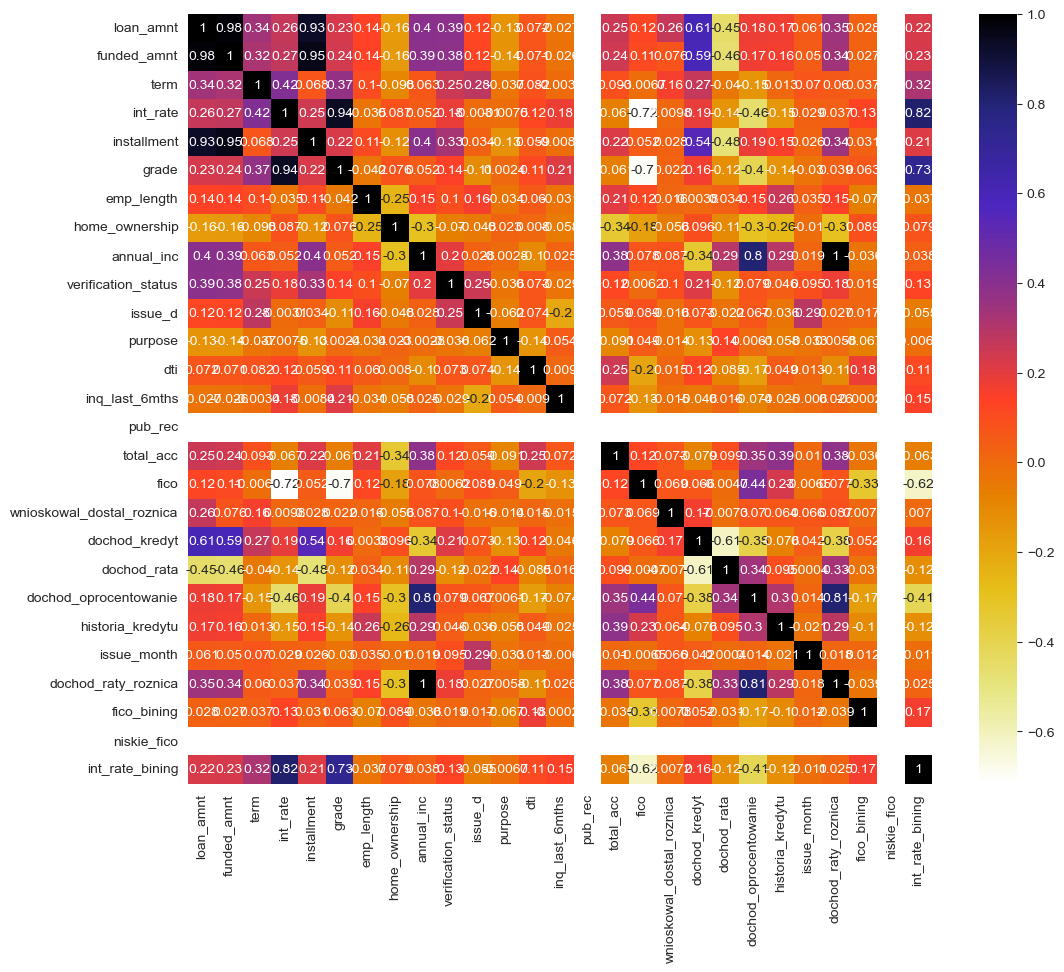

In [544]:
import seaborn as sns

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [545]:
def correlation(dataset, threshold):
    '''
    Ta funkcja pomoże znaleźć silnie skorelowane ze sobą zmienne i usunie pierwszą najbardziej skorelowana
    '''
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [546]:
corr_features = correlation(X_train, 0.6)
len(set(corr_features))

9

In [547]:
corr_features

{'dochod_kredyt',
 'dochod_oprocentowanie',
 'dochod_rata',
 'dochod_raty_roznica',
 'fico',
 'funded_amnt',
 'grade',
 'installment',
 'int_rate_bining'}

In [548]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)

### Hiperparametry - RandomSearch

In [549]:
# Hiperparametry modelu dostosuję przy pomocy RandomSearch

In [550]:
from sklearn.model_selection import RandomizedSearchCV

In [551]:
random_param = {
    'learning_rate': (0.3, 0.5, 0.7, 1, 1.2, 1.5),
    'n_estimators': range(100, 150, 200)
}

In [552]:
model = AdaBoostClassifier()

random_search = RandomizedSearchCV(estimator=model
                                 , param_distributions=random_param
                                 , n_iter=4*4*4*2
                                 , scoring='roc_auc' )

In [553]:
random_search.fit(X_train, Y_train)

best_parameters = random_search.best_params_  
print(best_parameters) 

C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=128. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 100, 'learning_rate': 0.3}


In [554]:
model_ADA_best=AdaBoostClassifier(**best_parameters)
model_ADA_best.fit(X_train, Y_train)

Y_pred=model_ADA_best.predict(X_test)
Y_pred1=model_ADA_best.predict_proba(X_test)


roc_model_ada_best = roc_auc_score(Y_test, Y_pred1[:,1])
print('AUROC: ', roc_model_ada_best)

AUROC:  0.896687200194719


### Ostateczny model ADABoost

In [555]:
# walidacja krzyżowa
model_ADA_cv = cross_val_score(model_ADA_best, X_train, Y_train, cv=5, scoring='roc_auc')
roc_model_ADA_cv = roc_auc_score(Y_test, Y_pred1[:,1])
print('AUROC: ', roc_model_ADA_cv)

AUROC:  0.896687200194719


In [556]:
# Macierz błędów
confusion_matrix(Y_test, Y_pred)

array([[ 714, 1008],
       [   6, 9862]], dtype=int64)

In [557]:
## Model prawidłowo sklasyfikował 9862 przykładów klasy negatywnej (TN) i 714 przykładów klasy pozytywnej (TP)

## Model popełnił 1008 błędów pierwszego rodzaju (FP) i 6 błędów drugiego rodzaju (FN)

In [558]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.41      0.58      1722
           1       0.91      1.00      0.95      9868

    accuracy                           0.91     11590
   macro avg       0.95      0.71      0.77     11590
weighted avg       0.92      0.91      0.90     11590



In [559]:
## Ostateczny wynik AUROC po walidacji krzyżowej wyniósł 89.7%. Dokładność modelu wyniosła 91%.

### Bias-variance tradeoff

In [560]:
X_train =X_train.values 
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values

In [561]:
from mlxtend.evaluate import bias_variance_decomp


model_ADA=AdaBoostClassifier(learning_rate = 0.5, n_estimators = 150)
model_ADA.fit(X_train, Y_train)


bias, var , loss = bias_variance_decomp(model_ADA, X_train, Y_train, X_test, Y_test, loss='0-1_loss', num_rounds=100, random_seed=1)

print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)
print('Loss: %.3f' % loss)

KeyboardInterrupt: 

In [ ]:
## Bias (różnica między średnią predykcją modelu, a poprawną wartością predykcji) 
## i variance (jak zmieni się prognoza modelu, jeśli dane treningowe zostaną zmienione) mają niskie wartości - 
## model jest zbalansowany

### Krzywa uczenia - learning curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model_ADA, X=X_train, y=Y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                       n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
## Krzywa uczenia potwierdza, że jest zachowany bias-variance trade-off